In [1]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Libraries

from sklearn.model_selection import train_test_split

# Machine Learning Libraries

import sklearn
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import  Ridge, LinearRegression, SGDRegressor, Lasso, ElasticNet

# additional libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import missingno as msno  #checking for missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor  #checking for multicollinearity

In [2]:
test_data = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Applied ML\HW2\books_test.csv")
train_data = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Applied ML\HW2\books_train.csv")
train_data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,26237,Revolutionary Girl Utena Vol. 3: To Sprout,Chiho Saito/Be-Pas,4.05,1591162076,9781591162070,eng,200,1153,16,2/4/2004,VIZ Media LLC
1,33448,Positioning: The Battle for Your Mind,Al Ries/Jack Trout,4.04,0071359168,9780071359160,en-US,246,126,9,1/18/2001,McGraw-Hill Education
2,13739,Twelve Fair Kingdoms,Suzette Haden Elgin,3.99,0425058506,9780425058503,eng,195,141,10,3/1/1983,Berkley
3,2711,The Riverside Chaucer,Geoffrey Chaucer/Larry Dean Benson/F.N. Robinson,4.18,0395290317,9780395290316,enm,1327,7760,152,12/12/1987,Houghton Mifflin
4,40540,PHP and MySQL Web Development (Developer's Lib...,Luke Welling/Laura Thomson,3.96,0672326728,752063326725,en-US,1008,590,31,10/1/2004,Sams


In [3]:
train_data['auth_occ'] = train_data.groupby('authors')['authors'].transform('count') # Add a new feature which has the number of occurences of each book
test_data['auth_occ'] = test_data.groupby('authors')['authors'].transform('count')

In [4]:
train_data['pub_occ'] = train_data.groupby('publisher')['publisher'].transform('count') # Add a new feature which has the number of occurences of each book
test_data['pub_occ'] = test_data.groupby('publisher')['publisher'].transform('count')

In [5]:
train_data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,auth_occ,pub_occ
0,26237,Revolutionary Girl Utena Vol. 3: To Sprout,Chiho Saito/Be-Pas,4.05,1591162076,9781591162070,eng,200,1153,16,2/4/2004,VIZ Media LLC,1,63
1,33448,Positioning: The Battle for Your Mind,Al Ries/Jack Trout,4.04,0071359168,9780071359160,en-US,246,126,9,1/18/2001,McGraw-Hill Education,4,7
2,13739,Twelve Fair Kingdoms,Suzette Haden Elgin,3.99,0425058506,9780425058503,eng,195,141,10,3/1/1983,Berkley,1,66
3,2711,The Riverside Chaucer,Geoffrey Chaucer/Larry Dean Benson/F.N. Robinson,4.18,0395290317,9780395290316,enm,1327,7760,152,12/12/1987,Houghton Mifflin,1,16
4,40540,PHP and MySQL Web Development (Developer's Lib...,Luke Welling/Laura Thomson,3.96,0672326728,752063326725,en-US,1008,590,31,10/1/2004,Sams,1,2


In [6]:
train_data = train_data.drop(['bookID', 'title', 'isbn', 'isbn13', 'authors', 'publisher'] , axis =1)
test_data = test_data.drop(['bookID', 'title', 'isbn', 'isbn13', 'authors', 'publisher'], axis =1)

In [7]:
train_data.head()

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,auth_occ,pub_occ
0,4.05,eng,200,1153,16,2/4/2004,1,63
1,4.04,en-US,246,126,9,1/18/2001,4,7
2,3.99,eng,195,141,10,3/1/1983,1,66
3,4.18,enm,1327,7760,152,12/12/1987,1,16
4,3.96,en-US,1008,590,31,10/1/2004,1,2


In [8]:
test_data.head()

,language_code,num_pages,ratings_count,text_reviews_count,publication_date,auth_occ,pub_occ
0,spa,380,1295,106,9/1/2004,1,3
1,eng,335,2519,85,3/13/2003,1,6
2,eng,336,265,10,3/27/2003,1,48
3,eng,275,30,3,10/8/2001,6,1
4,eng,301,9,1,10/1/1990,1,1


<AxesSubplot:>

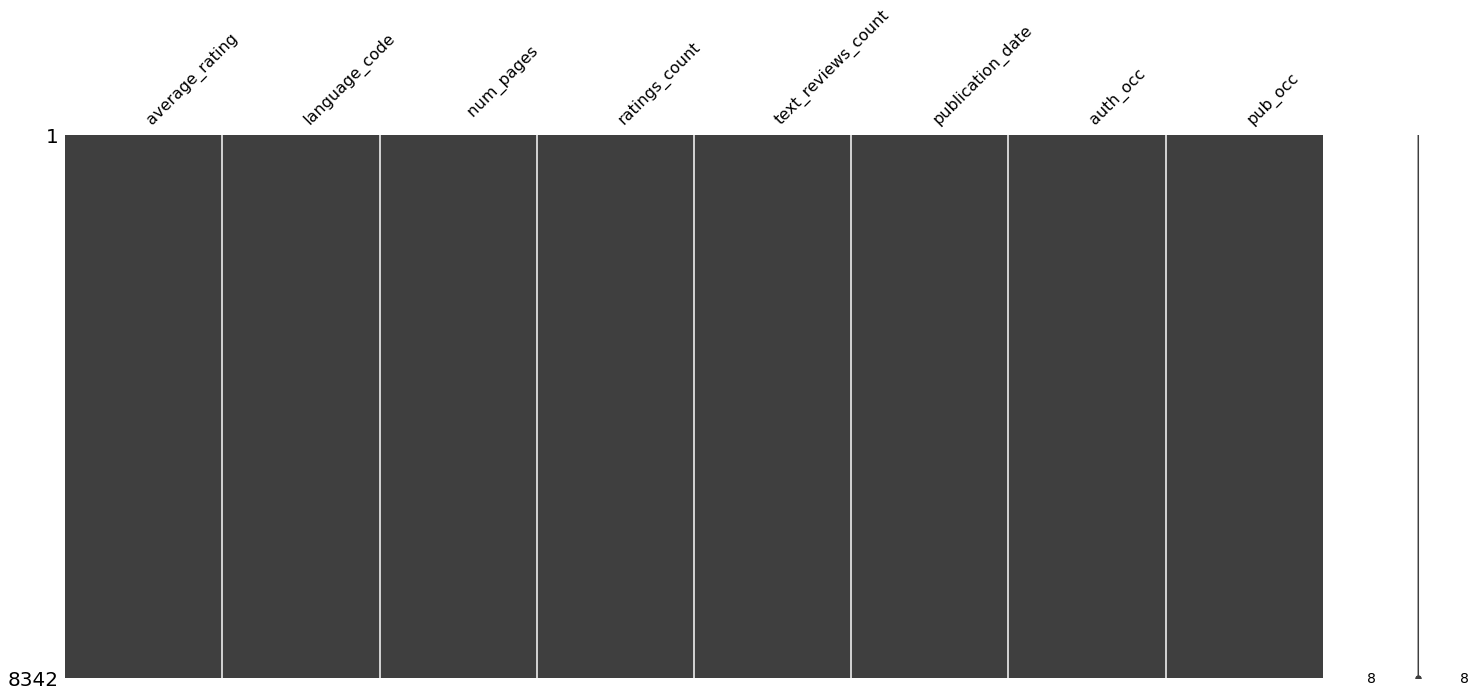

In [9]:
# checking for missing data
msno.matrix(train_data)

<AxesSubplot:>

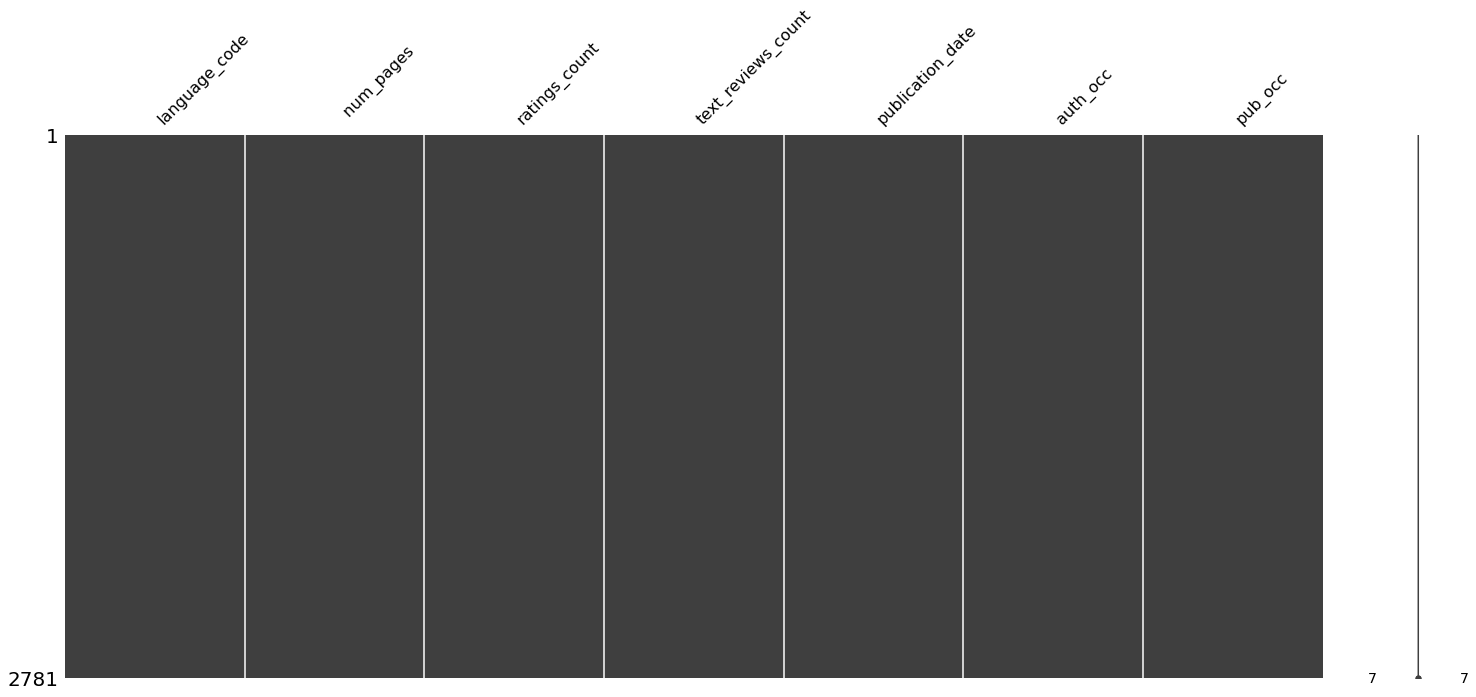

In [10]:
# checking for missing data
msno.matrix(test_data)

In [11]:
#Extracting numerical data
train_data_numerical = train_data.select_dtypes(include=['int64', 'float64'])
test_data_numerical =  test_data.select_dtypes(include=['int64', 'float64'])

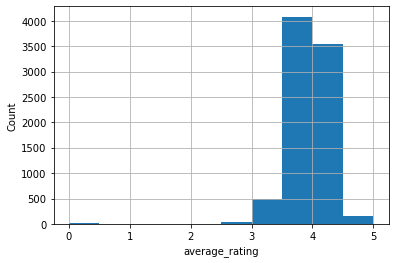

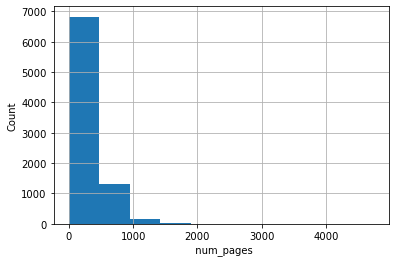

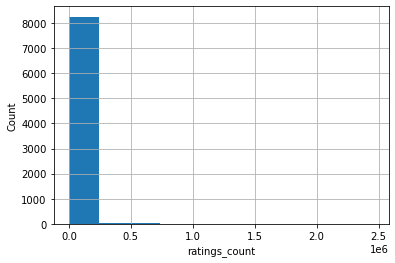

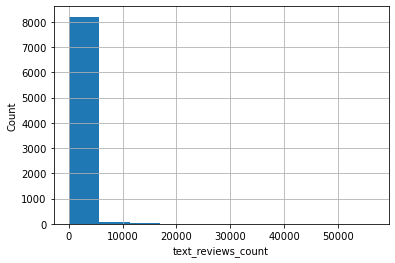

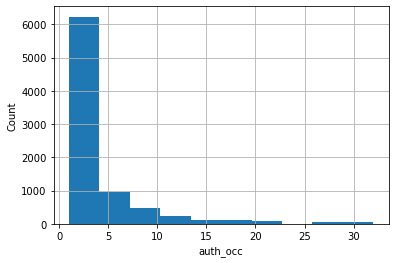

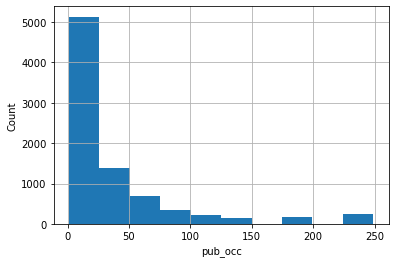

In [12]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in train_data_numerical:
    data = train_data_numerical.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

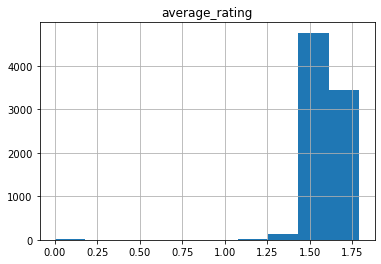

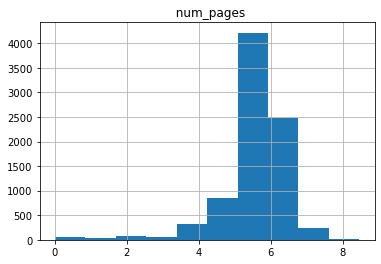

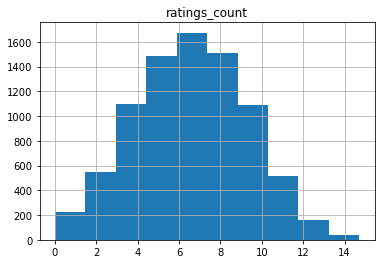

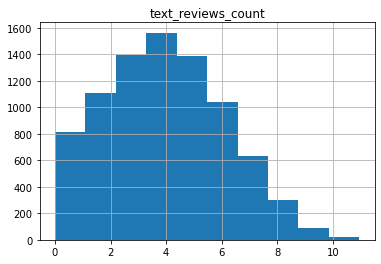

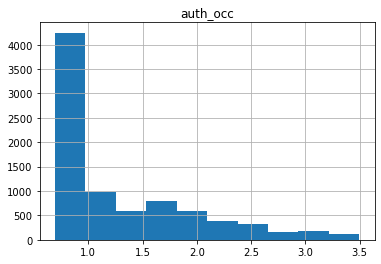

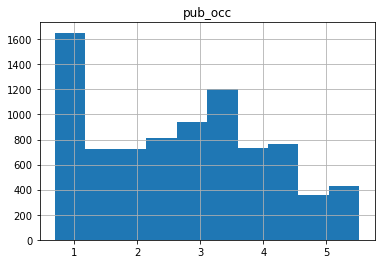

In [13]:
# we observe that some of the features don't follow the gaussian distribution. We can apply log transformation further
for feature in train_data_numerical:
    data = train_data_numerical.copy()
    data[feature] = np.log1p(data[feature])
    data[feature].hist()
    plt.title(feature)
    plt.show()

In [14]:
num_continuous_features_log=['average_rating', 'ratings_count', 'text_reviews_count', 'auth_occ', 'pub_occ', '  num_pages']
for feature in num_continuous_features_log:
    train_data[feature] = np.log1p(train_data[feature])

In [15]:
num_continuous_features_log=['ratings_count', 'text_reviews_count', 'auth_occ', 'pub_occ', '  num_pages']
for feature in num_continuous_features_log:
    test_data[feature] = np.log1p(test_data[feature])

<AxesSubplot:>

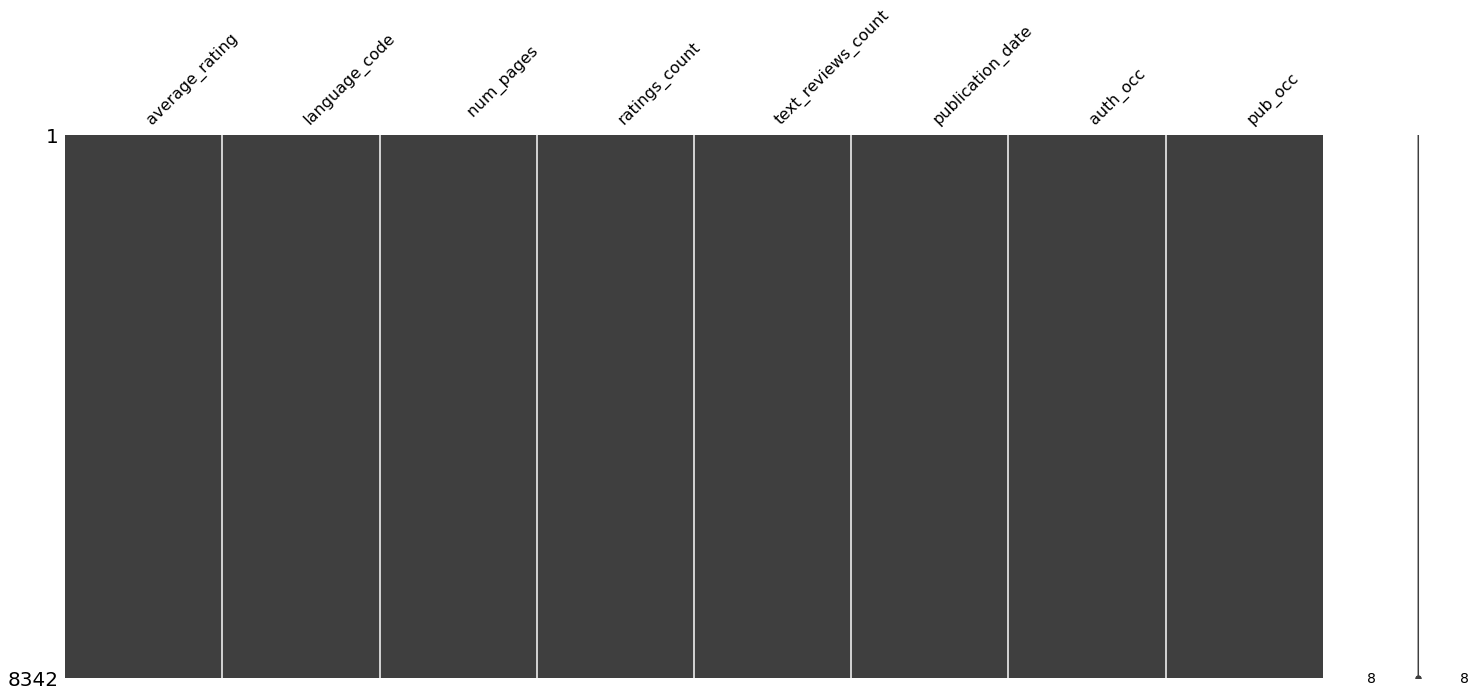

In [16]:
msno.matrix(train_data)

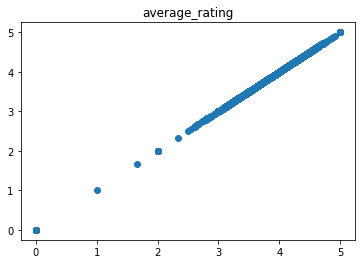

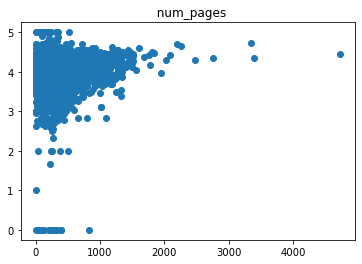

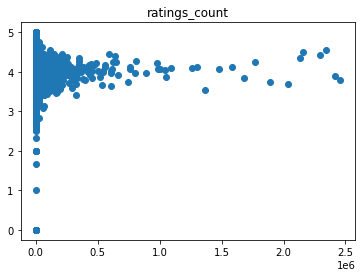

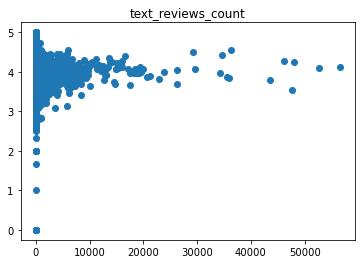

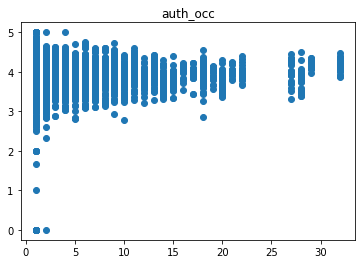

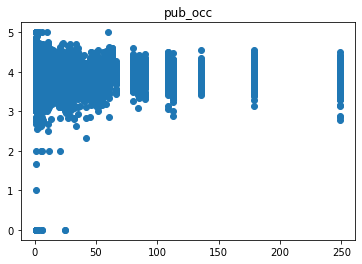

In [17]:
# let's see the relationship between SalePrice and these continuous variales

for feature in train_data_numerical:
    data = train_data_numerical.copy()
    plt.scatter(data[feature],data['average_rating'])
    plt.title(feature)
    plt.show()

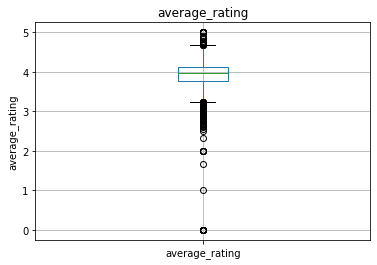

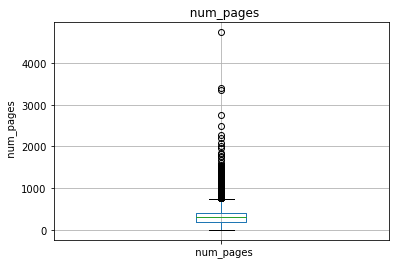

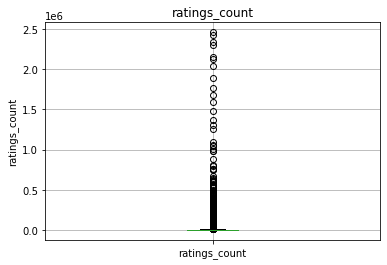

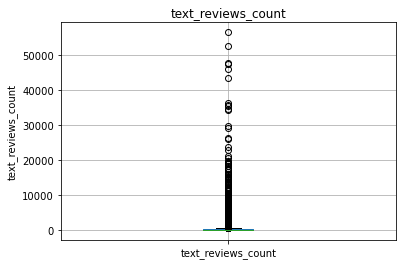

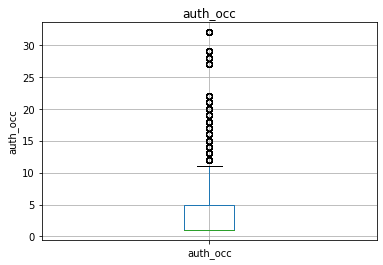

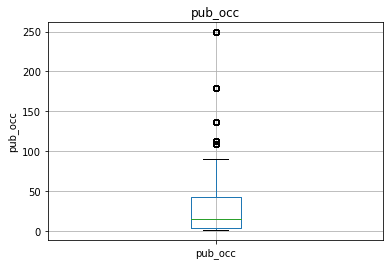

In [18]:
# boxplots
for feature in train_data_numerical:
    data= train_data_numerical.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [19]:
# split data column
train_data['publication_year'] = train_data['publication_date'].str.split('/').str[2]

In [20]:
train_data.head()

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,auth_occ,pub_occ,publication_year
0,1.619388,eng,5.303305,7.050989,2.833213,2/4/2004,0.693147,4.158883,2004
1,1.617406,en-US,5.509388,4.844187,2.302585,1/18/2001,1.609438,2.079442,2001
2,1.607436,eng,5.278115,4.955827,2.397895,3/1/1983,0.693147,4.204693,1983
3,1.644805,enm,7.191429,8.956866,5.030438,12/12/1987,0.693147,2.833213,1987
4,1.601406,en-US,6.916715,6.381816,3.465736,10/1/2004,0.693147,1.098612,2004


In [21]:
# split data column
test_data['publication_year'] = test_data['publication_date'].str.split('/').str[2]

In [22]:
test_data.head()

,language_code,num_pages,ratings_count,text_reviews_count,publication_date,auth_occ,pub_occ,publication_year
0,spa,5.942799,7.167038,4.672829,9/1/2004,0.693147,1.386294,2004
1,eng,5.817111,7.832014,4.454347,3/13/2003,0.693147,1.945910,2003
2,eng,5.820083,5.583496,2.397895,3/27/2003,0.693147,3.891820,2003
3,eng,5.620401,3.433987,1.386294,10/8/2001,1.945910,0.693147,2001
4,eng,5.710427,2.302585,0.693147,10/1/1990,0.693147,0.693147,1990


In [23]:
train_data = train_data.drop('publication_date', axis=1)
test_data = test_data.drop('publication_date', axis=1)

In [24]:
train_data.head()

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,auth_occ,pub_occ,publication_year
0,1.619388,eng,5.303305,7.050989,2.833213,0.693147,4.158883,2004
1,1.617406,en-US,5.509388,4.844187,2.302585,1.609438,2.079442,2001
2,1.607436,eng,5.278115,4.955827,2.397895,0.693147,4.204693,1983
3,1.644805,enm,7.191429,8.956866,5.030438,0.693147,2.833213,1987
4,1.601406,en-US,6.916715,6.381816,3.465736,0.693147,1.098612,2004


In [25]:
test_data.head()

,language_code,num_pages,ratings_count,text_reviews_count,auth_occ,pub_occ,publication_year
0,spa,5.942799,7.167038,4.672829,0.693147,1.386294,2004
1,eng,5.817111,7.832014,4.454347,0.693147,1.945910,2003
2,eng,5.820083,5.583496,2.397895,0.693147,3.891820,2003
3,eng,5.620401,3.433987,1.386294,1.945910,0.693147,2001
4,eng,5.710427,2.302585,0.693147,0.693147,0.693147,1990


In [26]:
train_data['publication_year'] = pd.to_numeric(train_data['publication_year'])
test_data['publication_year'] = pd.to_numeric(test_data['publication_year'])

In [27]:
#Extracting categorical data
train_data_categorical = train_data.select_dtypes(include=['object'])
test_data_categorical =  test_data.select_dtypes(include=['object'])

In [28]:
train_data_categorical.head()

,language_code
0,eng
1,en-US
2,eng
3,enm
4,en-US


In [29]:
# count the number of numerical features
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
print(f'Number of Numerical Features are {len(numerical_features)}')

Number of Numerical Features are 7


In [30]:
# count the number of categorical features
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
print(f'Number of Categorical Features are {len(categorical_features)}')

Number of Categorical Features are 1


In [31]:
# Let's encode the categorical variables
## ordinal encoder encoded the values alphabetically

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_data[categorical_features] = enc.fit_transform(train_data[categorical_features])
test_data[categorical_features] = enc.fit_transform(test_data[categorical_features])

In [32]:
train_data.head()

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,auth_occ,pub_occ,publication_year
0,1.619388,4.0,5.303305,7.050989,2.833213,0.693147,4.158883,2004
1,1.617406,3.0,5.509388,4.844187,2.302585,1.609438,2.079442,2001
2,1.607436,4.0,5.278115,4.955827,2.397895,0.693147,4.204693,1983
3,1.644805,5.0,7.191429,8.956866,5.030438,0.693147,2.833213,1987
4,1.601406,3.0,6.916715,6.381816,3.465736,0.693147,1.098612,2004


In [33]:
test_data.head()

,language_code,num_pages,ratings_count,text_reviews_count,auth_occ,pub_occ,publication_year
0,16.0,5.942799,7.167038,4.672829,0.693147,1.386294,2004
1,4.0,5.817111,7.832014,4.454347,0.693147,1.945910,2003
2,4.0,5.820083,5.583496,2.397895,0.693147,3.891820,2003
3,4.0,5.620401,3.433987,1.386294,1.945910,0.693147,2001
4,4.0,5.710427,2.302585,0.693147,0.693147,0.693147,1990


<AxesSubplot:>

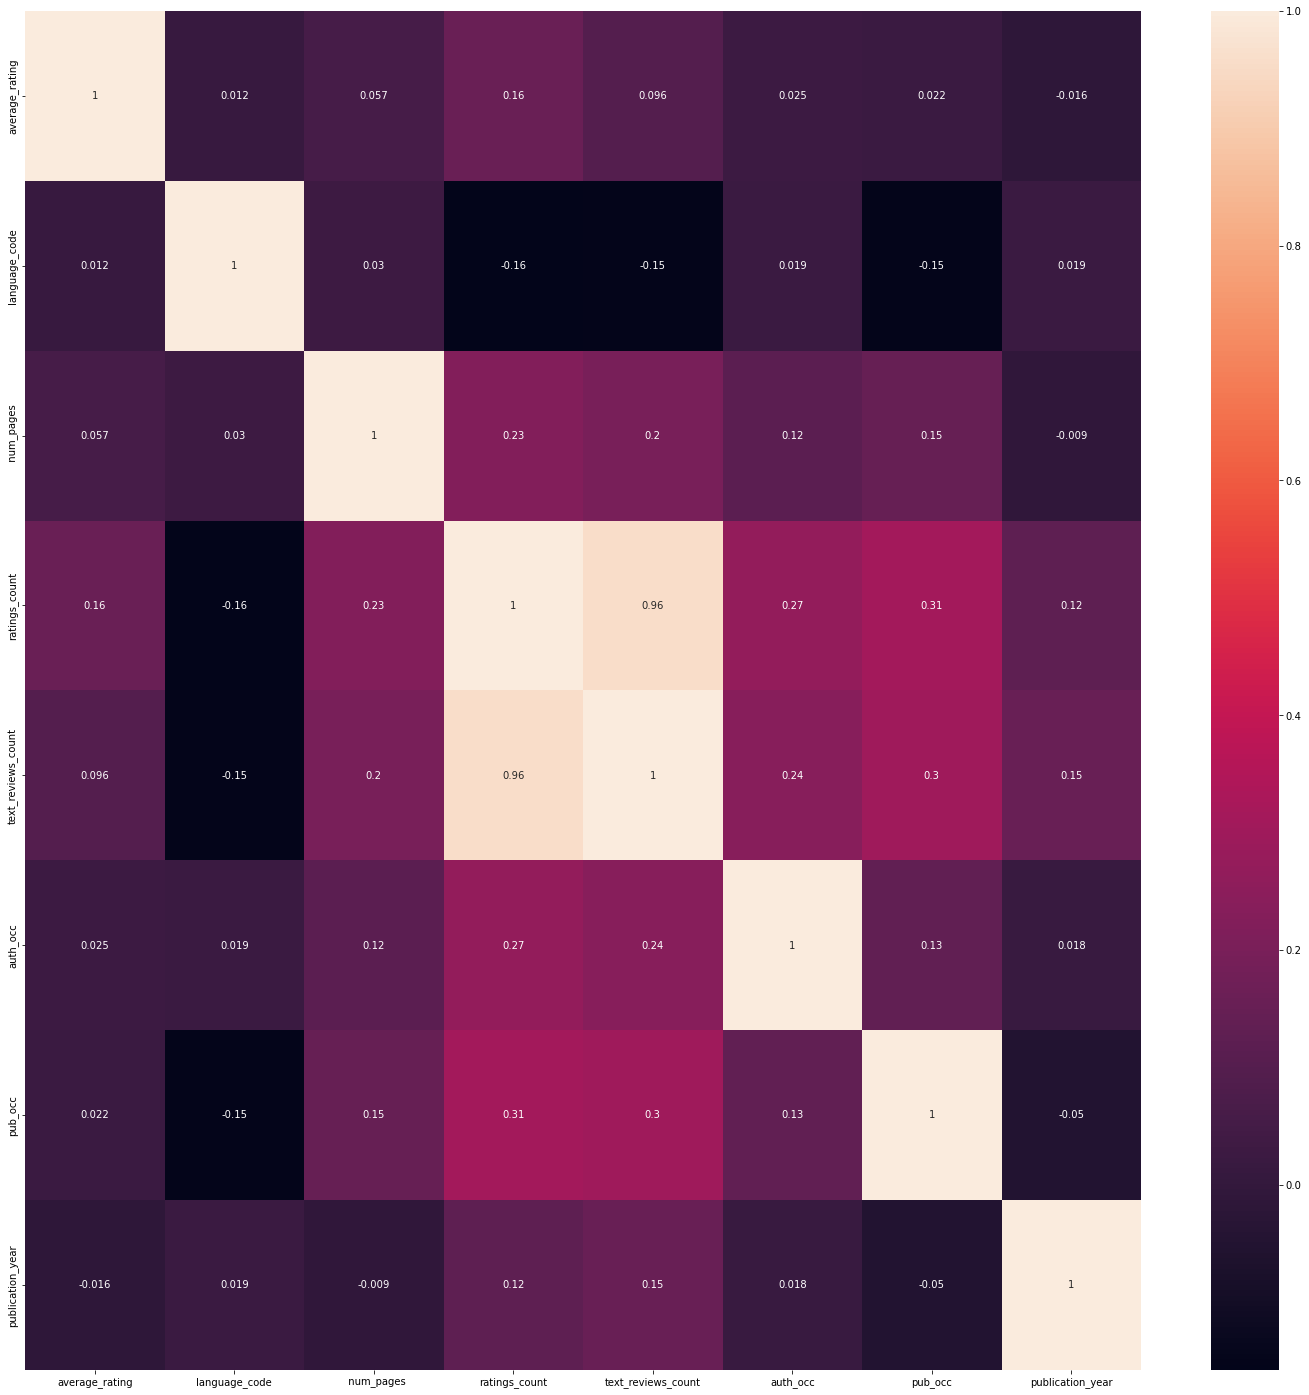

In [34]:
# let's see the correlation matrix
corr_mat = train_data.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(corr_mat, annot = True)

In [35]:
X_train = train_data.drop('average_rating',axis=1)
y_train = train_data['average_rating']

In [36]:
# develop a function for evaluating the model

def print_evaluate(true, predicted):
    mae=np.round(mean_absolute_error(true, predicted),3)
    mse=np.round(mean_squared_error(true, predicted),3)
    rmse=np.round(np.sqrt(mean_squared_error(true, predicted)),3)
    r2_square=np.round(r2_score(true, predicted),3)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Score:', r2_square)

def cross_val(model, X, y):
    pred=cross_val_score(model, X,y,cv=10)
    return np.round(pred.mean(),3)

def evaluate(true, predicted):
    mae=np.round(mean_absolute_error(true, predicted),3)
    mse=np.round(mean_squared_error(true, predicted),3)
    rmse=np.round(np.sqrt(mean_squared_error(true, predicted)),3)
    r2_square=np.round(r2_score(true, predicted),3)
    
    return mae,mse,rmse,r2_square 
    

In [37]:
# linear regression algorithm
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lin_reg, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.049
MSE:  0.009
RMSE:  0.094
R2 Score: 0.061
--------------------------------

Cross_validation score:



0.056

In [39]:
results_df=pd.DataFrame(data=[['Linear Regression', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056


In [40]:
# elactic net
el=ElasticNet()
el.fit(X_train, y_train)

train_pred=el.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(el, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.05
MSE:  0.009
RMSE:  0.097
R2 Score: 0.0
--------------------------------

Cross_validation score:



-0.001

In [41]:
results_df=results_df.append(pd.DataFrame(data=[['Elactic net', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001


In [42]:
# lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

train_pred=lasso.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lasso, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.05
MSE:  0.009
RMSE:  0.096
R2 Score: 0.024
--------------------------------

Cross_validation score:



0.02

In [43]:
results_df=results_df.append(pd.DataFrame(data=[['lasso', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020


In [44]:
# ridge
ridge=Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

train_pred=ridge.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(ridge, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.049
MSE:  0.009
RMSE:  0.094
R2 Score: 0.061
--------------------------------

Cross_validation score:



0.056

In [45]:
results_df=results_df.append(pd.DataFrame(data=[['ridge', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056


In [46]:
# polinomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

X_train_2_d=poly_reg.fit_transform(X_train)

lin_reg=LinearRegression()
lin_reg.fit(X_train_2_d, y_train)

train_pred=lin_reg.predict(X_train_2_d)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(el, X_train_2_d, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.05
MSE:  0.008
RMSE:  0.091
R2 Score: 0.12
--------------------------------

Cross_validation score:



0.056

In [47]:
results_df=results_df.append(pd.DataFrame(data=[['polynomial', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056
4,polynomial,0.050,0.008,0.091,0.120,0.056


In [48]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)

train_pred=rfr.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(rfr, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.017
MSE:  0.001
RMSE:  0.034
R2 Score: 0.878
--------------------------------

Cross_validation score:



0.146

In [49]:
results_df=results_df.append(pd.DataFrame(data=[['Random forest regressor', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056
4,polynomial,0.050,0.008,0.091,0.120,0.056
5,Random forest regressor,0.017,0.001,0.034,0.878,0.146


In [50]:
# SGDR regressor
lr = SGDRegressor()
lr.fit(X_train, y_train)

train_pred=lr.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lr, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  547946764243053.7
MSE:  3.0027243071796413e+29
RMSE:  547971195153508.2
R2 Score: -3.2043493394246533e+31
--------------------------------

Cross_validation score:



-7.847559528024329e+31

In [51]:
# Train an XGBoost regressor model 
import xgboost as xgb
xb = xgb.XGBRegressor()
xb.fit(X_train, y_train)

train_pred=xb.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(xb, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.029
MSE:  0.002
RMSE:  0.039
R2 Score: 0.838
--------------------------------

Cross_validation score:



-0.01

In [52]:
results_df=results_df.append(pd.DataFrame(data=[['XGBoost regressor', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056
4,polynomial,0.050,0.008,0.091,0.120,0.056
5,Random forest regressor,0.017,0.001,0.034,0.878,0.146
6,XGBoost regressor,0.029,0.002,0.039,0.838,-0.010


In [53]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

train_pred=gbrt.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(gbrt, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.044
MSE:  0.005
RMSE:  0.069
R2 Score: 0.495
--------------------------------

Cross_validation score:



0.142

In [54]:
results_df=results_df.append(pd.DataFrame(data=[['Gradient boosting', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056
4,polynomial,0.050,0.008,0.091,0.120,0.056
5,Random forest regressor,0.017,0.001,0.034,0.878,0.146
6,XGBoost regressor,0.029,0.002,0.039,0.838,-0.010
7,Gradient boosting,0.044,0.005,0.069,0.495,0.142


In [55]:
#we try another algorithms
lb = lgb.LGBMRegressor()
lb.fit(X_train, y_train)

LGBMRegressor()

In [56]:
train_pred=lb.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lb, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.04
MSE:  0.004
RMSE:  0.065
R2 Score: 0.543
--------------------------------

Cross_validation score:



0.174

In [57]:
results_df=results_df.append(pd.DataFrame(data=[['LightGBM', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056
4,polynomial,0.050,0.008,0.091,0.120,0.056
5,Random forest regressor,0.017,0.001,0.034,0.878,0.146
6,XGBoost regressor,0.029,0.002,0.039,0.838,-0.010
7,Gradient boosting,0.044,0.005,0.069,0.495,0.142
8,LightGBM,0.040,0.004,0.065,0.543,0.174


In [58]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train)

train_pred=cb.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(cb, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Learning rate set to 0.057245
0:	learn: 0.0952548	total: 155ms	remaining: 2m 35s
1:	learn: 0.0941589	total: 158ms	remaining: 1m 19s
2:	learn: 0.0930684	total: 162ms	remaining: 53.7s
3:	learn: 0.0917865	total: 165ms	remaining: 41.2s
4:	learn: 0.0908325	total: 168ms	remaining: 33.5s
5:	learn: 0.0899246	total: 172ms	remaining: 28.4s
6:	learn: 0.0889899	total: 175ms	remaining: 24.8s
7:	learn: 0.0881528	total: 178ms	remaining: 22s
8:	learn: 0.0872052	total: 181ms	remaining: 19.9s
9:	learn: 0.0864453	total: 186ms	remaining: 18.4s
10:	learn: 0.0857623	total: 190ms	remaining: 17.1s
11:	learn: 0.0848263	total: 194ms	remaining: 16s
12:	learn: 0.0842223	total: 199ms	remaining: 15.1s
13:	learn: 0.0834638	total: 202ms	remaining: 14.2s
14:	learn: 0.0828634	total: 205ms	remaining: 13.5s
15:	learn: 0.0822583	total: 208ms	remaining: 12.8s
16:	learn: 0.0816076	total: 212ms	remaining: 12.3s
17:	learn: 0.0811762	total: 216ms	remaining: 11.8s
18:	learn: 0.0807413	total: 219ms	remaining: 11.3s
19:	learn: 0.

199:	learn: 0.0647044	total: 889ms	remaining: 3.56s
200:	learn: 0.0646709	total: 895ms	remaining: 3.56s
201:	learn: 0.0646323	total: 898ms	remaining: 3.55s
202:	learn: 0.0646127	total: 902ms	remaining: 3.54s
203:	learn: 0.0645006	total: 906ms	remaining: 3.54s
204:	learn: 0.0644336	total: 911ms	remaining: 3.53s
205:	learn: 0.0643956	total: 916ms	remaining: 3.53s
206:	learn: 0.0643715	total: 920ms	remaining: 3.52s
207:	learn: 0.0642888	total: 925ms	remaining: 3.52s
208:	learn: 0.0642607	total: 929ms	remaining: 3.52s
209:	learn: 0.0642497	total: 932ms	remaining: 3.51s
210:	learn: 0.0642111	total: 935ms	remaining: 3.5s
211:	learn: 0.0641295	total: 941ms	remaining: 3.5s
212:	learn: 0.0640813	total: 944ms	remaining: 3.49s
213:	learn: 0.0640293	total: 948ms	remaining: 3.48s
214:	learn: 0.0639904	total: 952ms	remaining: 3.48s
215:	learn: 0.0639464	total: 957ms	remaining: 3.47s
216:	learn: 0.0639232	total: 961ms	remaining: 3.47s
217:	learn: 0.0639067	total: 964ms	remaining: 3.46s
218:	learn: 0.

400:	learn: 0.0580135	total: 1.6s	remaining: 2.39s
401:	learn: 0.0580037	total: 1.6s	remaining: 2.39s
402:	learn: 0.0579802	total: 1.61s	remaining: 2.38s
403:	learn: 0.0579624	total: 1.61s	remaining: 2.38s
404:	learn: 0.0579296	total: 1.62s	remaining: 2.37s
405:	learn: 0.0578972	total: 1.62s	remaining: 2.37s
406:	learn: 0.0578711	total: 1.63s	remaining: 2.37s
407:	learn: 0.0578513	total: 1.63s	remaining: 2.36s
408:	learn: 0.0578404	total: 1.63s	remaining: 2.36s
409:	learn: 0.0578225	total: 1.64s	remaining: 2.35s
410:	learn: 0.0578046	total: 1.64s	remaining: 2.35s
411:	learn: 0.0577195	total: 1.64s	remaining: 2.35s
412:	learn: 0.0576913	total: 1.65s	remaining: 2.34s
413:	learn: 0.0576583	total: 1.65s	remaining: 2.33s
414:	learn: 0.0576214	total: 1.65s	remaining: 2.33s
415:	learn: 0.0576163	total: 1.66s	remaining: 2.33s
416:	learn: 0.0576011	total: 1.66s	remaining: 2.32s
417:	learn: 0.0575747	total: 1.67s	remaining: 2.32s
418:	learn: 0.0575492	total: 1.67s	remaining: 2.32s
419:	learn: 0.

590:	learn: 0.0545207	total: 2.32s	remaining: 1.6s
591:	learn: 0.0545086	total: 2.32s	remaining: 1.6s
592:	learn: 0.0544798	total: 2.33s	remaining: 1.6s
593:	learn: 0.0544687	total: 2.33s	remaining: 1.59s
594:	learn: 0.0544600	total: 2.34s	remaining: 1.59s
595:	learn: 0.0544424	total: 2.34s	remaining: 1.59s
596:	learn: 0.0544235	total: 2.35s	remaining: 1.58s
597:	learn: 0.0543908	total: 2.35s	remaining: 1.58s
598:	learn: 0.0543747	total: 2.36s	remaining: 1.58s
599:	learn: 0.0543654	total: 2.36s	remaining: 1.57s
600:	learn: 0.0543481	total: 2.37s	remaining: 1.57s
601:	learn: 0.0543438	total: 2.37s	remaining: 1.57s
602:	learn: 0.0543388	total: 2.38s	remaining: 1.56s
603:	learn: 0.0543154	total: 2.38s	remaining: 1.56s
604:	learn: 0.0543083	total: 2.39s	remaining: 1.56s
605:	learn: 0.0542979	total: 2.39s	remaining: 1.55s
606:	learn: 0.0542887	total: 2.39s	remaining: 1.55s
607:	learn: 0.0542730	total: 2.4s	remaining: 1.55s
608:	learn: 0.0542630	total: 2.4s	remaining: 1.54s
609:	learn: 0.054

768:	learn: 0.0519005	total: 3.03s	remaining: 911ms
769:	learn: 0.0518869	total: 3.04s	remaining: 907ms
770:	learn: 0.0518734	total: 3.04s	remaining: 903ms
771:	learn: 0.0518623	total: 3.04s	remaining: 900ms
772:	learn: 0.0518479	total: 3.05s	remaining: 896ms
773:	learn: 0.0518462	total: 3.05s	remaining: 892ms
774:	learn: 0.0518283	total: 3.06s	remaining: 888ms
775:	learn: 0.0518058	total: 3.06s	remaining: 884ms
776:	learn: 0.0517995	total: 3.06s	remaining: 880ms
777:	learn: 0.0517976	total: 3.07s	remaining: 876ms
778:	learn: 0.0517854	total: 3.07s	remaining: 871ms
779:	learn: 0.0517828	total: 3.07s	remaining: 867ms
780:	learn: 0.0517671	total: 3.08s	remaining: 863ms
781:	learn: 0.0517584	total: 3.08s	remaining: 859ms
782:	learn: 0.0517525	total: 3.08s	remaining: 855ms
783:	learn: 0.0517463	total: 3.09s	remaining: 851ms
784:	learn: 0.0517299	total: 3.09s	remaining: 847ms
785:	learn: 0.0517223	total: 3.1s	remaining: 843ms
786:	learn: 0.0517135	total: 3.1s	remaining: 839ms
787:	learn: 0.

944:	learn: 0.0500898	total: 3.73s	remaining: 217ms
945:	learn: 0.0500893	total: 3.74s	remaining: 213ms
946:	learn: 0.0500810	total: 3.74s	remaining: 209ms
947:	learn: 0.0500698	total: 3.75s	remaining: 206ms
948:	learn: 0.0500605	total: 3.75s	remaining: 202ms
949:	learn: 0.0500499	total: 3.75s	remaining: 198ms
950:	learn: 0.0500292	total: 3.76s	remaining: 194ms
951:	learn: 0.0500214	total: 3.76s	remaining: 190ms
952:	learn: 0.0500109	total: 3.77s	remaining: 186ms
953:	learn: 0.0499991	total: 3.77s	remaining: 182ms
954:	learn: 0.0499915	total: 3.77s	remaining: 178ms
955:	learn: 0.0499771	total: 3.78s	remaining: 174ms
956:	learn: 0.0499707	total: 3.78s	remaining: 170ms
957:	learn: 0.0499664	total: 3.78s	remaining: 166ms
958:	learn: 0.0499595	total: 3.79s	remaining: 162ms
959:	learn: 0.0499320	total: 3.79s	remaining: 158ms
960:	learn: 0.0499308	total: 3.79s	remaining: 154ms
961:	learn: 0.0499104	total: 3.8s	remaining: 150ms
962:	learn: 0.0499023	total: 3.8s	remaining: 146ms
963:	learn: 0.

137:	learn: 0.0684012	total: 473ms	remaining: 2.95s
138:	learn: 0.0683682	total: 477ms	remaining: 2.95s
139:	learn: 0.0683447	total: 480ms	remaining: 2.95s
140:	learn: 0.0681231	total: 484ms	remaining: 2.95s
141:	learn: 0.0681057	total: 487ms	remaining: 2.94s
142:	learn: 0.0680912	total: 491ms	remaining: 2.94s
143:	learn: 0.0680381	total: 495ms	remaining: 2.94s
144:	learn: 0.0680234	total: 499ms	remaining: 2.94s
145:	learn: 0.0679101	total: 502ms	remaining: 2.94s
146:	learn: 0.0678718	total: 505ms	remaining: 2.93s
147:	learn: 0.0678481	total: 508ms	remaining: 2.92s
148:	learn: 0.0678277	total: 511ms	remaining: 2.92s
149:	learn: 0.0677644	total: 514ms	remaining: 2.91s
150:	learn: 0.0675699	total: 517ms	remaining: 2.91s
151:	learn: 0.0675277	total: 520ms	remaining: 2.9s
152:	learn: 0.0674372	total: 523ms	remaining: 2.9s
153:	learn: 0.0673799	total: 526ms	remaining: 2.89s
154:	learn: 0.0673511	total: 529ms	remaining: 2.88s
155:	learn: 0.0672095	total: 532ms	remaining: 2.88s
156:	learn: 0.

298:	learn: 0.0616501	total: 1.01s	remaining: 2.38s
299:	learn: 0.0616334	total: 1.02s	remaining: 2.37s
300:	learn: 0.0615903	total: 1.02s	remaining: 2.37s
301:	learn: 0.0615776	total: 1.02s	remaining: 2.37s
302:	learn: 0.0615478	total: 1.03s	remaining: 2.37s
303:	learn: 0.0615351	total: 1.03s	remaining: 2.36s
304:	learn: 0.0615179	total: 1.03s	remaining: 2.36s
305:	learn: 0.0614874	total: 1.04s	remaining: 2.35s
306:	learn: 0.0614129	total: 1.04s	remaining: 2.35s
307:	learn: 0.0613845	total: 1.04s	remaining: 2.35s
308:	learn: 0.0613629	total: 1.05s	remaining: 2.34s
309:	learn: 0.0613361	total: 1.05s	remaining: 2.34s
310:	learn: 0.0613231	total: 1.05s	remaining: 2.33s
311:	learn: 0.0612698	total: 1.06s	remaining: 2.33s
312:	learn: 0.0612033	total: 1.06s	remaining: 2.33s
313:	learn: 0.0611751	total: 1.06s	remaining: 2.32s
314:	learn: 0.0611499	total: 1.07s	remaining: 2.32s
315:	learn: 0.0611373	total: 1.07s	remaining: 2.31s
316:	learn: 0.0610728	total: 1.07s	remaining: 2.31s
317:	learn: 

486:	learn: 0.0566546	total: 1.73s	remaining: 1.82s
487:	learn: 0.0566306	total: 1.73s	remaining: 1.82s
488:	learn: 0.0566108	total: 1.74s	remaining: 1.82s
489:	learn: 0.0565911	total: 1.74s	remaining: 1.81s
490:	learn: 0.0565795	total: 1.75s	remaining: 1.81s
491:	learn: 0.0565505	total: 1.75s	remaining: 1.81s
492:	learn: 0.0565406	total: 1.76s	remaining: 1.81s
493:	learn: 0.0565183	total: 1.77s	remaining: 1.81s
494:	learn: 0.0564990	total: 1.78s	remaining: 1.82s
495:	learn: 0.0564906	total: 1.78s	remaining: 1.81s
496:	learn: 0.0564781	total: 1.79s	remaining: 1.81s
497:	learn: 0.0564634	total: 1.8s	remaining: 1.81s
498:	learn: 0.0564455	total: 1.81s	remaining: 1.82s
499:	learn: 0.0564287	total: 1.81s	remaining: 1.81s
500:	learn: 0.0563532	total: 1.82s	remaining: 1.82s
501:	learn: 0.0563394	total: 1.83s	remaining: 1.81s
502:	learn: 0.0563312	total: 1.84s	remaining: 1.81s
503:	learn: 0.0563124	total: 1.84s	remaining: 1.81s
504:	learn: 0.0563006	total: 1.85s	remaining: 1.81s
505:	learn: 0

648:	learn: 0.0537004	total: 2.58s	remaining: 1.4s
649:	learn: 0.0536852	total: 2.59s	remaining: 1.39s
650:	learn: 0.0536749	total: 2.59s	remaining: 1.39s
651:	learn: 0.0536637	total: 2.6s	remaining: 1.39s
652:	learn: 0.0536616	total: 2.6s	remaining: 1.38s
653:	learn: 0.0536373	total: 2.61s	remaining: 1.38s
654:	learn: 0.0536245	total: 2.62s	remaining: 1.38s
655:	learn: 0.0536144	total: 2.62s	remaining: 1.37s
656:	learn: 0.0536044	total: 2.62s	remaining: 1.37s
657:	learn: 0.0535836	total: 2.63s	remaining: 1.36s
658:	learn: 0.0535743	total: 2.63s	remaining: 1.36s
659:	learn: 0.0535665	total: 2.64s	remaining: 1.36s
660:	learn: 0.0535488	total: 2.64s	remaining: 1.35s
661:	learn: 0.0535310	total: 2.65s	remaining: 1.35s
662:	learn: 0.0535051	total: 2.65s	remaining: 1.35s
663:	learn: 0.0534933	total: 2.65s	remaining: 1.34s
664:	learn: 0.0534713	total: 2.66s	remaining: 1.34s
665:	learn: 0.0534652	total: 2.66s	remaining: 1.33s
666:	learn: 0.0534560	total: 2.67s	remaining: 1.33s
667:	learn: 0.0

845:	learn: 0.0512159	total: 3.46s	remaining: 629ms
846:	learn: 0.0511944	total: 3.46s	remaining: 625ms
847:	learn: 0.0511608	total: 3.46s	remaining: 621ms
848:	learn: 0.0511463	total: 3.47s	remaining: 617ms
849:	learn: 0.0511399	total: 3.47s	remaining: 613ms
850:	learn: 0.0511303	total: 3.48s	remaining: 609ms
851:	learn: 0.0511168	total: 3.48s	remaining: 605ms
852:	learn: 0.0511122	total: 3.49s	remaining: 601ms
853:	learn: 0.0511002	total: 3.49s	remaining: 597ms
854:	learn: 0.0510751	total: 3.5s	remaining: 593ms
855:	learn: 0.0510560	total: 3.5s	remaining: 589ms
856:	learn: 0.0510512	total: 3.5s	remaining: 584ms
857:	learn: 0.0510347	total: 3.5s	remaining: 580ms
858:	learn: 0.0510125	total: 3.51s	remaining: 576ms
859:	learn: 0.0510011	total: 3.51s	remaining: 572ms
860:	learn: 0.0509871	total: 3.52s	remaining: 568ms
861:	learn: 0.0509868	total: 3.52s	remaining: 564ms
862:	learn: 0.0509643	total: 3.52s	remaining: 560ms
863:	learn: 0.0509453	total: 3.53s	remaining: 555ms
864:	learn: 0.05

51:	learn: 0.0721714	total: 156ms	remaining: 2.84s
52:	learn: 0.0719768	total: 159ms	remaining: 2.85s
53:	learn: 0.0718923	total: 163ms	remaining: 2.85s
54:	learn: 0.0717982	total: 166ms	remaining: 2.85s
55:	learn: 0.0717479	total: 170ms	remaining: 2.87s
56:	learn: 0.0716518	total: 174ms	remaining: 2.87s
57:	learn: 0.0715647	total: 177ms	remaining: 2.87s
58:	learn: 0.0715122	total: 182ms	remaining: 2.9s
59:	learn: 0.0714133	total: 184ms	remaining: 2.89s
60:	learn: 0.0713441	total: 188ms	remaining: 2.89s
61:	learn: 0.0712783	total: 191ms	remaining: 2.88s
62:	learn: 0.0712023	total: 194ms	remaining: 2.88s
63:	learn: 0.0710640	total: 197ms	remaining: 2.88s
64:	learn: 0.0710256	total: 200ms	remaining: 2.88s
65:	learn: 0.0709712	total: 204ms	remaining: 2.89s
66:	learn: 0.0708155	total: 207ms	remaining: 2.89s
67:	learn: 0.0707661	total: 211ms	remaining: 2.88s
68:	learn: 0.0706101	total: 213ms	remaining: 2.88s
69:	learn: 0.0705687	total: 216ms	remaining: 2.87s
70:	learn: 0.0705166	total: 220m

216:	learn: 0.0633573	total: 666ms	remaining: 2.4s
217:	learn: 0.0633247	total: 670ms	remaining: 2.4s
218:	learn: 0.0632947	total: 673ms	remaining: 2.4s
219:	learn: 0.0632654	total: 677ms	remaining: 2.4s
220:	learn: 0.0631976	total: 680ms	remaining: 2.4s
221:	learn: 0.0631813	total: 684ms	remaining: 2.4s
222:	learn: 0.0631423	total: 688ms	remaining: 2.4s
223:	learn: 0.0631283	total: 691ms	remaining: 2.39s
224:	learn: 0.0631071	total: 694ms	remaining: 2.39s
225:	learn: 0.0629451	total: 697ms	remaining: 2.39s
226:	learn: 0.0629062	total: 700ms	remaining: 2.38s
227:	learn: 0.0628176	total: 703ms	remaining: 2.38s
228:	learn: 0.0627580	total: 707ms	remaining: 2.38s
229:	learn: 0.0627371	total: 710ms	remaining: 2.38s
230:	learn: 0.0627134	total: 713ms	remaining: 2.37s
231:	learn: 0.0627022	total: 717ms	remaining: 2.37s
232:	learn: 0.0626647	total: 720ms	remaining: 2.37s
233:	learn: 0.0626342	total: 723ms	remaining: 2.37s
234:	learn: 0.0626219	total: 726ms	remaining: 2.36s
235:	learn: 0.06256

388:	learn: 0.0576198	total: 1.19s	remaining: 1.87s
389:	learn: 0.0575987	total: 1.2s	remaining: 1.87s
390:	learn: 0.0575411	total: 1.2s	remaining: 1.87s
391:	learn: 0.0575126	total: 1.2s	remaining: 1.87s
392:	learn: 0.0574721	total: 1.21s	remaining: 1.87s
393:	learn: 0.0574365	total: 1.21s	remaining: 1.86s
394:	learn: 0.0574125	total: 1.22s	remaining: 1.86s
395:	learn: 0.0574030	total: 1.22s	remaining: 1.86s
396:	learn: 0.0573860	total: 1.22s	remaining: 1.86s
397:	learn: 0.0573289	total: 1.23s	remaining: 1.85s
398:	learn: 0.0573147	total: 1.23s	remaining: 1.85s
399:	learn: 0.0572983	total: 1.23s	remaining: 1.85s
400:	learn: 0.0572821	total: 1.23s	remaining: 1.84s
401:	learn: 0.0572728	total: 1.24s	remaining: 1.84s
402:	learn: 0.0572509	total: 1.24s	remaining: 1.84s
403:	learn: 0.0572424	total: 1.24s	remaining: 1.83s
404:	learn: 0.0572098	total: 1.25s	remaining: 1.83s
405:	learn: 0.0571787	total: 1.25s	remaining: 1.83s
406:	learn: 0.0571350	total: 1.25s	remaining: 1.82s
407:	learn: 0.0

597:	learn: 0.0534628	total: 1.89s	remaining: 1.27s
598:	learn: 0.0534349	total: 1.9s	remaining: 1.27s
599:	learn: 0.0534341	total: 1.9s	remaining: 1.27s
600:	learn: 0.0534231	total: 1.9s	remaining: 1.26s
601:	learn: 0.0534009	total: 1.91s	remaining: 1.26s
602:	learn: 0.0533934	total: 1.91s	remaining: 1.26s
603:	learn: 0.0533779	total: 1.92s	remaining: 1.25s
604:	learn: 0.0533628	total: 1.92s	remaining: 1.25s
605:	learn: 0.0533520	total: 1.92s	remaining: 1.25s
606:	learn: 0.0533442	total: 1.93s	remaining: 1.25s
607:	learn: 0.0533223	total: 1.93s	remaining: 1.24s
608:	learn: 0.0533027	total: 1.93s	remaining: 1.24s
609:	learn: 0.0532974	total: 1.94s	remaining: 1.24s
610:	learn: 0.0532810	total: 1.94s	remaining: 1.23s
611:	learn: 0.0532719	total: 1.94s	remaining: 1.23s
612:	learn: 0.0532561	total: 1.95s	remaining: 1.23s
613:	learn: 0.0532494	total: 1.95s	remaining: 1.23s
614:	learn: 0.0532399	total: 1.95s	remaining: 1.22s
615:	learn: 0.0532304	total: 1.96s	remaining: 1.22s
616:	learn: 0.0

762:	learn: 0.0513281	total: 2.44s	remaining: 757ms
763:	learn: 0.0513109	total: 2.44s	remaining: 754ms
764:	learn: 0.0512855	total: 2.44s	remaining: 751ms
765:	learn: 0.0512684	total: 2.45s	remaining: 748ms
766:	learn: 0.0512681	total: 2.45s	remaining: 745ms
767:	learn: 0.0512544	total: 2.46s	remaining: 743ms
768:	learn: 0.0512443	total: 2.46s	remaining: 740ms
769:	learn: 0.0512369	total: 2.46s	remaining: 737ms
770:	learn: 0.0512297	total: 2.47s	remaining: 733ms
771:	learn: 0.0512238	total: 2.47s	remaining: 730ms
772:	learn: 0.0511916	total: 2.48s	remaining: 727ms
773:	learn: 0.0511836	total: 2.48s	remaining: 724ms
774:	learn: 0.0511661	total: 2.48s	remaining: 721ms
775:	learn: 0.0511522	total: 2.48s	remaining: 717ms
776:	learn: 0.0511391	total: 2.49s	remaining: 714ms
777:	learn: 0.0511317	total: 2.49s	remaining: 711ms
778:	learn: 0.0511122	total: 2.5s	remaining: 708ms
779:	learn: 0.0511034	total: 2.5s	remaining: 705ms
780:	learn: 0.0510935	total: 2.5s	remaining: 702ms
781:	learn: 0.0

964:	learn: 0.0489949	total: 3.14s	remaining: 114ms
965:	learn: 0.0489831	total: 3.14s	remaining: 111ms
966:	learn: 0.0489685	total: 3.15s	remaining: 107ms
967:	learn: 0.0489548	total: 3.15s	remaining: 104ms
968:	learn: 0.0489508	total: 3.15s	remaining: 101ms
969:	learn: 0.0489430	total: 3.16s	remaining: 97.7ms
970:	learn: 0.0489328	total: 3.16s	remaining: 94.5ms
971:	learn: 0.0489282	total: 3.17s	remaining: 91.2ms
972:	learn: 0.0489152	total: 3.17s	remaining: 88ms
973:	learn: 0.0489117	total: 3.17s	remaining: 84.7ms
974:	learn: 0.0489073	total: 3.18s	remaining: 81.4ms
975:	learn: 0.0488961	total: 3.18s	remaining: 78.2ms
976:	learn: 0.0488854	total: 3.18s	remaining: 74.9ms
977:	learn: 0.0488851	total: 3.19s	remaining: 71.6ms
978:	learn: 0.0488765	total: 3.19s	remaining: 68.4ms
979:	learn: 0.0488643	total: 3.19s	remaining: 65.2ms
980:	learn: 0.0488569	total: 3.2s	remaining: 61.9ms
981:	learn: 0.0488456	total: 3.2s	remaining: 58.6ms
982:	learn: 0.0488377	total: 3.2s	remaining: 55.4ms
983

183:	learn: 0.0637815	total: 550ms	remaining: 2.44s
184:	learn: 0.0637612	total: 553ms	remaining: 2.44s
185:	learn: 0.0637242	total: 557ms	remaining: 2.44s
186:	learn: 0.0636814	total: 561ms	remaining: 2.44s
187:	learn: 0.0636613	total: 564ms	remaining: 2.44s
188:	learn: 0.0636426	total: 568ms	remaining: 2.44s
189:	learn: 0.0635596	total: 572ms	remaining: 2.44s
190:	learn: 0.0635043	total: 576ms	remaining: 2.44s
191:	learn: 0.0633970	total: 579ms	remaining: 2.44s
192:	learn: 0.0633797	total: 583ms	remaining: 2.44s
193:	learn: 0.0633546	total: 586ms	remaining: 2.43s
194:	learn: 0.0632646	total: 589ms	remaining: 2.43s
195:	learn: 0.0632419	total: 592ms	remaining: 2.43s
196:	learn: 0.0632259	total: 595ms	remaining: 2.42s
197:	learn: 0.0631664	total: 599ms	remaining: 2.42s
198:	learn: 0.0631273	total: 602ms	remaining: 2.42s
199:	learn: 0.0630083	total: 605ms	remaining: 2.42s
200:	learn: 0.0629537	total: 608ms	remaining: 2.42s
201:	learn: 0.0628862	total: 611ms	remaining: 2.41s
202:	learn: 

391:	learn: 0.0568813	total: 1.19s	remaining: 1.84s
392:	learn: 0.0568254	total: 1.19s	remaining: 1.84s
393:	learn: 0.0568066	total: 1.19s	remaining: 1.84s
394:	learn: 0.0567908	total: 1.2s	remaining: 1.83s
395:	learn: 0.0567661	total: 1.2s	remaining: 1.83s
396:	learn: 0.0567524	total: 1.21s	remaining: 1.83s
397:	learn: 0.0567402	total: 1.21s	remaining: 1.83s
398:	learn: 0.0567241	total: 1.21s	remaining: 1.83s
399:	learn: 0.0566940	total: 1.22s	remaining: 1.82s
400:	learn: 0.0566311	total: 1.22s	remaining: 1.82s
401:	learn: 0.0565925	total: 1.22s	remaining: 1.82s
402:	learn: 0.0565533	total: 1.23s	remaining: 1.81s
403:	learn: 0.0565345	total: 1.23s	remaining: 1.81s
404:	learn: 0.0565158	total: 1.23s	remaining: 1.81s
405:	learn: 0.0564813	total: 1.24s	remaining: 1.81s
406:	learn: 0.0564195	total: 1.24s	remaining: 1.8s
407:	learn: 0.0563857	total: 1.24s	remaining: 1.8s
408:	learn: 0.0563675	total: 1.24s	remaining: 1.8s
409:	learn: 0.0562963	total: 1.25s	remaining: 1.79s
410:	learn: 0.056

560:	learn: 0.0535742	total: 1.73s	remaining: 1.35s
561:	learn: 0.0535573	total: 1.74s	remaining: 1.35s
562:	learn: 0.0535304	total: 1.74s	remaining: 1.35s
563:	learn: 0.0535109	total: 1.74s	remaining: 1.35s
564:	learn: 0.0535001	total: 1.75s	remaining: 1.34s
565:	learn: 0.0534848	total: 1.75s	remaining: 1.34s
566:	learn: 0.0534785	total: 1.76s	remaining: 1.34s
567:	learn: 0.0534254	total: 1.76s	remaining: 1.34s
568:	learn: 0.0534164	total: 1.76s	remaining: 1.34s
569:	learn: 0.0533748	total: 1.77s	remaining: 1.33s
570:	learn: 0.0533618	total: 1.77s	remaining: 1.33s
571:	learn: 0.0533569	total: 1.77s	remaining: 1.33s
572:	learn: 0.0533346	total: 1.78s	remaining: 1.32s
573:	learn: 0.0533215	total: 1.78s	remaining: 1.32s
574:	learn: 0.0533145	total: 1.78s	remaining: 1.32s
575:	learn: 0.0533051	total: 1.79s	remaining: 1.31s
576:	learn: 0.0532784	total: 1.79s	remaining: 1.31s
577:	learn: 0.0532632	total: 1.79s	remaining: 1.31s
578:	learn: 0.0532399	total: 1.8s	remaining: 1.31s
579:	learn: 0

719:	learn: 0.0513111	total: 2.26s	remaining: 878ms
720:	learn: 0.0512938	total: 2.26s	remaining: 875ms
721:	learn: 0.0512803	total: 2.26s	remaining: 872ms
722:	learn: 0.0512747	total: 2.27s	remaining: 869ms
723:	learn: 0.0512687	total: 2.27s	remaining: 866ms
724:	learn: 0.0512342	total: 2.28s	remaining: 864ms
725:	learn: 0.0512220	total: 2.28s	remaining: 861ms
726:	learn: 0.0512019	total: 2.29s	remaining: 858ms
727:	learn: 0.0511942	total: 2.29s	remaining: 856ms
728:	learn: 0.0511838	total: 2.29s	remaining: 852ms
729:	learn: 0.0511600	total: 2.3s	remaining: 849ms
730:	learn: 0.0511501	total: 2.3s	remaining: 846ms
731:	learn: 0.0511435	total: 2.3s	remaining: 843ms
732:	learn: 0.0511361	total: 2.31s	remaining: 840ms
733:	learn: 0.0511239	total: 2.31s	remaining: 837ms
734:	learn: 0.0511165	total: 2.31s	remaining: 834ms
735:	learn: 0.0511081	total: 2.32s	remaining: 831ms
736:	learn: 0.0510858	total: 2.32s	remaining: 828ms
737:	learn: 0.0510854	total: 2.32s	remaining: 825ms
738:	learn: 0.0

912:	learn: 0.0491941	total: 2.95s	remaining: 281ms
913:	learn: 0.0491821	total: 2.96s	remaining: 278ms
914:	learn: 0.0491707	total: 2.96s	remaining: 275ms
915:	learn: 0.0491639	total: 2.97s	remaining: 272ms
916:	learn: 0.0491464	total: 2.97s	remaining: 269ms
917:	learn: 0.0491307	total: 2.98s	remaining: 266ms
918:	learn: 0.0491191	total: 2.98s	remaining: 263ms
919:	learn: 0.0491089	total: 2.99s	remaining: 260ms
920:	learn: 0.0491002	total: 2.99s	remaining: 257ms
921:	learn: 0.0490868	total: 3s	remaining: 253ms
922:	learn: 0.0490771	total: 3s	remaining: 250ms
923:	learn: 0.0490600	total: 3s	remaining: 247ms
924:	learn: 0.0490521	total: 3.01s	remaining: 244ms
925:	learn: 0.0490424	total: 3.01s	remaining: 241ms
926:	learn: 0.0490189	total: 3.02s	remaining: 238ms
927:	learn: 0.0490127	total: 3.02s	remaining: 235ms
928:	learn: 0.0490002	total: 3.03s	remaining: 232ms
929:	learn: 0.0489927	total: 3.04s	remaining: 229ms
930:	learn: 0.0489679	total: 3.04s	remaining: 225ms
931:	learn: 0.0489569

88:	learn: 0.0693110	total: 339ms	remaining: 3.47s
89:	learn: 0.0692439	total: 342ms	remaining: 3.46s
90:	learn: 0.0692148	total: 346ms	remaining: 3.46s
91:	learn: 0.0690609	total: 350ms	remaining: 3.46s
92:	learn: 0.0690392	total: 354ms	remaining: 3.46s
93:	learn: 0.0690154	total: 358ms	remaining: 3.45s
94:	learn: 0.0689672	total: 363ms	remaining: 3.46s
95:	learn: 0.0689352	total: 367ms	remaining: 3.46s
96:	learn: 0.0687615	total: 373ms	remaining: 3.47s
97:	learn: 0.0686866	total: 377ms	remaining: 3.47s
98:	learn: 0.0686649	total: 381ms	remaining: 3.47s
99:	learn: 0.0686326	total: 385ms	remaining: 3.46s
100:	learn: 0.0684895	total: 388ms	remaining: 3.45s
101:	learn: 0.0684297	total: 393ms	remaining: 3.46s
102:	learn: 0.0684010	total: 396ms	remaining: 3.45s
103:	learn: 0.0683299	total: 400ms	remaining: 3.44s
104:	learn: 0.0683067	total: 403ms	remaining: 3.43s
105:	learn: 0.0682850	total: 408ms	remaining: 3.44s
106:	learn: 0.0682617	total: 412ms	remaining: 3.44s
107:	learn: 0.0682514	to

260:	learn: 0.0611967	total: 1.02s	remaining: 2.9s
261:	learn: 0.0611686	total: 1.03s	remaining: 2.9s
262:	learn: 0.0610129	total: 1.04s	remaining: 2.91s
263:	learn: 0.0610013	total: 1.04s	remaining: 2.91s
264:	learn: 0.0609513	total: 1.05s	remaining: 2.91s
265:	learn: 0.0608791	total: 1.05s	remaining: 2.91s
266:	learn: 0.0608466	total: 1.06s	remaining: 2.91s
267:	learn: 0.0607801	total: 1.06s	remaining: 2.91s
268:	learn: 0.0607577	total: 1.07s	remaining: 2.91s
269:	learn: 0.0607314	total: 1.08s	remaining: 2.91s
270:	learn: 0.0607108	total: 1.08s	remaining: 2.91s
271:	learn: 0.0606966	total: 1.09s	remaining: 2.91s
272:	learn: 0.0606567	total: 1.09s	remaining: 2.9s
273:	learn: 0.0606075	total: 1.09s	remaining: 2.9s
274:	learn: 0.0605845	total: 1.1s	remaining: 2.9s
275:	learn: 0.0605600	total: 1.1s	remaining: 2.89s
276:	learn: 0.0605313	total: 1.11s	remaining: 2.89s
277:	learn: 0.0604077	total: 1.11s	remaining: 2.88s
278:	learn: 0.0603693	total: 1.11s	remaining: 2.88s
279:	learn: 0.06033

435:	learn: 0.0561088	total: 1.9s	remaining: 2.46s
436:	learn: 0.0560819	total: 1.9s	remaining: 2.45s
437:	learn: 0.0560602	total: 1.91s	remaining: 2.45s
438:	learn: 0.0560585	total: 1.91s	remaining: 2.44s
439:	learn: 0.0560268	total: 1.92s	remaining: 2.44s
440:	learn: 0.0560073	total: 1.92s	remaining: 2.44s
441:	learn: 0.0559859	total: 1.93s	remaining: 2.43s
442:	learn: 0.0559535	total: 1.93s	remaining: 2.43s
443:	learn: 0.0559325	total: 1.94s	remaining: 2.43s
444:	learn: 0.0559099	total: 1.94s	remaining: 2.42s
445:	learn: 0.0558894	total: 1.95s	remaining: 2.42s
446:	learn: 0.0558679	total: 1.95s	remaining: 2.41s
447:	learn: 0.0558532	total: 1.96s	remaining: 2.41s
448:	learn: 0.0558366	total: 1.96s	remaining: 2.41s
449:	learn: 0.0558142	total: 1.97s	remaining: 2.4s
450:	learn: 0.0557670	total: 1.97s	remaining: 2.4s
451:	learn: 0.0557413	total: 1.98s	remaining: 2.4s
452:	learn: 0.0557245	total: 1.98s	remaining: 2.39s
453:	learn: 0.0556825	total: 1.98s	remaining: 2.39s
454:	learn: 0.055

629:	learn: 0.0526624	total: 2.77s	remaining: 1.63s
630:	learn: 0.0526512	total: 2.77s	remaining: 1.62s
631:	learn: 0.0526371	total: 2.78s	remaining: 1.62s
632:	learn: 0.0526275	total: 2.79s	remaining: 1.61s
633:	learn: 0.0525789	total: 2.79s	remaining: 1.61s
634:	learn: 0.0525651	total: 2.8s	remaining: 1.61s
635:	learn: 0.0525604	total: 2.8s	remaining: 1.6s
636:	learn: 0.0525260	total: 2.81s	remaining: 1.6s
637:	learn: 0.0525163	total: 2.81s	remaining: 1.6s
638:	learn: 0.0525031	total: 2.82s	remaining: 1.59s
639:	learn: 0.0524852	total: 2.82s	remaining: 1.59s
640:	learn: 0.0524553	total: 2.83s	remaining: 1.58s
641:	learn: 0.0524545	total: 2.83s	remaining: 1.58s
642:	learn: 0.0524537	total: 2.84s	remaining: 1.58s
643:	learn: 0.0524367	total: 2.85s	remaining: 1.57s
644:	learn: 0.0524285	total: 2.85s	remaining: 1.57s
645:	learn: 0.0524171	total: 2.85s	remaining: 1.56s
646:	learn: 0.0523954	total: 2.86s	remaining: 1.56s
647:	learn: 0.0523797	total: 2.87s	remaining: 1.56s
648:	learn: 0.052

824:	learn: 0.0501582	total: 3.63s	remaining: 771ms
825:	learn: 0.0501409	total: 3.64s	remaining: 766ms
826:	learn: 0.0501284	total: 3.64s	remaining: 762ms
827:	learn: 0.0501220	total: 3.65s	remaining: 757ms
828:	learn: 0.0501168	total: 3.65s	remaining: 753ms
829:	learn: 0.0501067	total: 3.65s	remaining: 748ms
830:	learn: 0.0500958	total: 3.66s	remaining: 744ms
831:	learn: 0.0500806	total: 3.66s	remaining: 740ms
832:	learn: 0.0500730	total: 3.67s	remaining: 735ms
833:	learn: 0.0500579	total: 3.67s	remaining: 731ms
834:	learn: 0.0500498	total: 3.67s	remaining: 726ms
835:	learn: 0.0500388	total: 3.68s	remaining: 722ms
836:	learn: 0.0500262	total: 3.68s	remaining: 717ms
837:	learn: 0.0500179	total: 3.69s	remaining: 713ms
838:	learn: 0.0500107	total: 3.69s	remaining: 708ms
839:	learn: 0.0500102	total: 3.69s	remaining: 704ms
840:	learn: 0.0499960	total: 3.7s	remaining: 699ms
841:	learn: 0.0499911	total: 3.7s	remaining: 695ms
842:	learn: 0.0499767	total: 3.71s	remaining: 691ms
843:	learn: 0.

Learning rate set to 0.056301
0:	learn: 0.0952638	total: 4.42ms	remaining: 4.41s
1:	learn: 0.0939624	total: 8.57ms	remaining: 4.28s
2:	learn: 0.0928739	total: 12.4ms	remaining: 4.11s
3:	learn: 0.0915402	total: 16.3ms	remaining: 4.07s
4:	learn: 0.0905170	total: 20.4ms	remaining: 4.06s
5:	learn: 0.0896072	total: 24.2ms	remaining: 4.02s
6:	learn: 0.0886209	total: 28.1ms	remaining: 3.98s
7:	learn: 0.0876707	total: 31.9ms	remaining: 3.96s
8:	learn: 0.0868639	total: 35.8ms	remaining: 3.95s
9:	learn: 0.0860159	total: 39.8ms	remaining: 3.94s
10:	learn: 0.0853014	total: 43.7ms	remaining: 3.93s
11:	learn: 0.0845412	total: 48.1ms	remaining: 3.96s
12:	learn: 0.0838087	total: 52.5ms	remaining: 3.99s
13:	learn: 0.0831311	total: 57.6ms	remaining: 4.06s
14:	learn: 0.0826034	total: 61.8ms	remaining: 4.06s
15:	learn: 0.0819901	total: 65.7ms	remaining: 4.04s
16:	learn: 0.0813667	total: 69.9ms	remaining: 4.04s
17:	learn: 0.0809029	total: 73.9ms	remaining: 4.03s
18:	learn: 0.0803245	total: 78.1ms	remaining

174:	learn: 0.0649715	total: 879ms	remaining: 4.14s
175:	learn: 0.0649536	total: 885ms	remaining: 4.14s
176:	learn: 0.0649126	total: 890ms	remaining: 4.14s
177:	learn: 0.0648618	total: 895ms	remaining: 4.13s
178:	learn: 0.0648293	total: 899ms	remaining: 4.12s
179:	learn: 0.0647865	total: 904ms	remaining: 4.12s
180:	learn: 0.0647504	total: 910ms	remaining: 4.12s
181:	learn: 0.0647253	total: 914ms	remaining: 4.11s
182:	learn: 0.0647092	total: 919ms	remaining: 4.1s
183:	learn: 0.0646314	total: 923ms	remaining: 4.09s
184:	learn: 0.0646062	total: 929ms	remaining: 4.09s
185:	learn: 0.0645820	total: 935ms	remaining: 4.09s
186:	learn: 0.0645484	total: 940ms	remaining: 4.08s
187:	learn: 0.0644447	total: 946ms	remaining: 4.08s
188:	learn: 0.0644307	total: 952ms	remaining: 4.09s
189:	learn: 0.0643898	total: 958ms	remaining: 4.08s
190:	learn: 0.0643690	total: 963ms	remaining: 4.08s
191:	learn: 0.0643312	total: 970ms	remaining: 4.08s
192:	learn: 0.0642993	total: 977ms	remaining: 4.09s
193:	learn: 0

341:	learn: 0.0587057	total: 1.73s	remaining: 3.33s
342:	learn: 0.0586435	total: 1.74s	remaining: 3.33s
343:	learn: 0.0586282	total: 1.74s	remaining: 3.32s
344:	learn: 0.0586097	total: 1.75s	remaining: 3.31s
345:	learn: 0.0585847	total: 1.75s	remaining: 3.31s
346:	learn: 0.0585303	total: 1.75s	remaining: 3.3s
347:	learn: 0.0585135	total: 1.76s	remaining: 3.3s
348:	learn: 0.0584495	total: 1.76s	remaining: 3.29s
349:	learn: 0.0584111	total: 1.77s	remaining: 3.29s
350:	learn: 0.0583598	total: 1.77s	remaining: 3.28s
351:	learn: 0.0583350	total: 1.78s	remaining: 3.27s
352:	learn: 0.0582880	total: 1.78s	remaining: 3.26s
353:	learn: 0.0582344	total: 1.78s	remaining: 3.25s
354:	learn: 0.0582177	total: 1.79s	remaining: 3.25s
355:	learn: 0.0581635	total: 1.79s	remaining: 3.24s
356:	learn: 0.0581132	total: 1.79s	remaining: 3.23s
357:	learn: 0.0580956	total: 1.8s	remaining: 3.23s
358:	learn: 0.0580548	total: 1.8s	remaining: 3.22s
359:	learn: 0.0580358	total: 1.81s	remaining: 3.21s
360:	learn: 0.05

535:	learn: 0.0546123	total: 2.52s	remaining: 2.18s
536:	learn: 0.0545961	total: 2.52s	remaining: 2.17s
537:	learn: 0.0545768	total: 2.53s	remaining: 2.17s
538:	learn: 0.0545570	total: 2.53s	remaining: 2.17s
539:	learn: 0.0545498	total: 2.54s	remaining: 2.16s
540:	learn: 0.0545267	total: 2.54s	remaining: 2.15s
541:	learn: 0.0545069	total: 2.54s	remaining: 2.15s
542:	learn: 0.0544755	total: 2.55s	remaining: 2.14s
543:	learn: 0.0544322	total: 2.55s	remaining: 2.14s
544:	learn: 0.0544163	total: 2.55s	remaining: 2.13s
545:	learn: 0.0544037	total: 2.56s	remaining: 2.13s
546:	learn: 0.0543659	total: 2.56s	remaining: 2.12s
547:	learn: 0.0543513	total: 2.56s	remaining: 2.12s
548:	learn: 0.0543394	total: 2.57s	remaining: 2.11s
549:	learn: 0.0543199	total: 2.57s	remaining: 2.1s
550:	learn: 0.0543074	total: 2.58s	remaining: 2.1s
551:	learn: 0.0542516	total: 2.58s	remaining: 2.09s
552:	learn: 0.0542357	total: 2.58s	remaining: 2.09s
553:	learn: 0.0542200	total: 2.58s	remaining: 2.08s
554:	learn: 0.

722:	learn: 0.0518026	total: 3.22s	remaining: 1.23s
723:	learn: 0.0517984	total: 3.22s	remaining: 1.23s
724:	learn: 0.0517908	total: 3.23s	remaining: 1.22s
725:	learn: 0.0517711	total: 3.23s	remaining: 1.22s
726:	learn: 0.0517533	total: 3.23s	remaining: 1.21s
727:	learn: 0.0517408	total: 3.24s	remaining: 1.21s
728:	learn: 0.0517359	total: 3.24s	remaining: 1.21s
729:	learn: 0.0517310	total: 3.25s	remaining: 1.2s
730:	learn: 0.0517216	total: 3.25s	remaining: 1.2s
731:	learn: 0.0517004	total: 3.25s	remaining: 1.19s
732:	learn: 0.0516883	total: 3.25s	remaining: 1.19s
733:	learn: 0.0516663	total: 3.26s	remaining: 1.18s
734:	learn: 0.0516546	total: 3.26s	remaining: 1.18s
735:	learn: 0.0516468	total: 3.27s	remaining: 1.17s
736:	learn: 0.0516325	total: 3.27s	remaining: 1.17s
737:	learn: 0.0516223	total: 3.27s	remaining: 1.16s
738:	learn: 0.0515792	total: 3.28s	remaining: 1.16s
739:	learn: 0.0515687	total: 3.28s	remaining: 1.15s
740:	learn: 0.0515666	total: 3.28s	remaining: 1.15s
741:	learn: 0.

930:	learn: 0.0492026	total: 3.92s	remaining: 291ms
931:	learn: 0.0491933	total: 3.92s	remaining: 286ms
932:	learn: 0.0491855	total: 3.93s	remaining: 282ms
933:	learn: 0.0491751	total: 3.93s	remaining: 278ms
934:	learn: 0.0491616	total: 3.94s	remaining: 274ms
935:	learn: 0.0491506	total: 3.94s	remaining: 269ms
936:	learn: 0.0491440	total: 3.94s	remaining: 265ms
937:	learn: 0.0491257	total: 3.95s	remaining: 261ms
938:	learn: 0.0491243	total: 3.95s	remaining: 257ms
939:	learn: 0.0491092	total: 3.96s	remaining: 252ms
940:	learn: 0.0491021	total: 3.96s	remaining: 248ms
941:	learn: 0.0490907	total: 3.96s	remaining: 244ms
942:	learn: 0.0490853	total: 3.96s	remaining: 240ms
943:	learn: 0.0490785	total: 3.97s	remaining: 235ms
944:	learn: 0.0490722	total: 3.97s	remaining: 231ms
945:	learn: 0.0490580	total: 3.98s	remaining: 227ms
946:	learn: 0.0490332	total: 3.98s	remaining: 223ms
947:	learn: 0.0490131	total: 3.98s	remaining: 218ms
948:	learn: 0.0490058	total: 3.99s	remaining: 214ms
949:	learn: 

124:	learn: 0.0667196	total: 471ms	remaining: 3.29s
125:	learn: 0.0666950	total: 473ms	remaining: 3.28s
126:	learn: 0.0666384	total: 479ms	remaining: 3.29s
127:	learn: 0.0665673	total: 483ms	remaining: 3.29s
128:	learn: 0.0664297	total: 486ms	remaining: 3.28s
129:	learn: 0.0662961	total: 490ms	remaining: 3.28s
130:	learn: 0.0662707	total: 495ms	remaining: 3.28s
131:	learn: 0.0662310	total: 498ms	remaining: 3.28s
132:	learn: 0.0662116	total: 503ms	remaining: 3.28s
133:	learn: 0.0661660	total: 506ms	remaining: 3.27s
134:	learn: 0.0661119	total: 509ms	remaining: 3.26s
135:	learn: 0.0660870	total: 512ms	remaining: 3.25s
136:	learn: 0.0660684	total: 515ms	remaining: 3.25s
137:	learn: 0.0660595	total: 518ms	remaining: 3.24s
138:	learn: 0.0659480	total: 521ms	remaining: 3.23s
139:	learn: 0.0659306	total: 525ms	remaining: 3.23s
140:	learn: 0.0658156	total: 528ms	remaining: 3.22s
141:	learn: 0.0657377	total: 531ms	remaining: 3.21s
142:	learn: 0.0657188	total: 534ms	remaining: 3.2s
143:	learn: 0

312:	learn: 0.0593623	total: 1.34s	remaining: 2.95s
313:	learn: 0.0593484	total: 1.35s	remaining: 2.94s
314:	learn: 0.0593250	total: 1.35s	remaining: 2.94s
315:	learn: 0.0593037	total: 1.36s	remaining: 2.94s
316:	learn: 0.0592884	total: 1.36s	remaining: 2.93s
317:	learn: 0.0592092	total: 1.37s	remaining: 2.93s
318:	learn: 0.0591541	total: 1.37s	remaining: 2.93s
319:	learn: 0.0591364	total: 1.38s	remaining: 2.93s
320:	learn: 0.0591036	total: 1.38s	remaining: 2.92s
321:	learn: 0.0590646	total: 1.38s	remaining: 2.92s
322:	learn: 0.0590615	total: 1.39s	remaining: 2.91s
323:	learn: 0.0590218	total: 1.39s	remaining: 2.91s
324:	learn: 0.0590109	total: 1.4s	remaining: 2.9s
325:	learn: 0.0589263	total: 1.4s	remaining: 2.9s
326:	learn: 0.0588874	total: 1.41s	remaining: 2.9s
327:	learn: 0.0588736	total: 1.41s	remaining: 2.89s
328:	learn: 0.0588380	total: 1.42s	remaining: 2.89s
329:	learn: 0.0588016	total: 1.42s	remaining: 2.89s
330:	learn: 0.0587852	total: 1.43s	remaining: 2.89s
331:	learn: 0.058

477:	learn: 0.0552172	total: 2.04s	remaining: 2.23s
478:	learn: 0.0551766	total: 2.05s	remaining: 2.23s
479:	learn: 0.0551570	total: 2.05s	remaining: 2.22s
480:	learn: 0.0551425	total: 2.06s	remaining: 2.22s
481:	learn: 0.0551255	total: 2.06s	remaining: 2.21s
482:	learn: 0.0551134	total: 2.07s	remaining: 2.21s
483:	learn: 0.0550963	total: 2.07s	remaining: 2.21s
484:	learn: 0.0550789	total: 2.08s	remaining: 2.2s
485:	learn: 0.0550334	total: 2.08s	remaining: 2.2s
486:	learn: 0.0550202	total: 2.08s	remaining: 2.19s
487:	learn: 0.0549952	total: 2.09s	remaining: 2.19s
488:	learn: 0.0549809	total: 2.09s	remaining: 2.19s
489:	learn: 0.0549778	total: 2.09s	remaining: 2.18s
490:	learn: 0.0549473	total: 2.1s	remaining: 2.17s
491:	learn: 0.0549137	total: 2.1s	remaining: 2.17s
492:	learn: 0.0548957	total: 2.11s	remaining: 2.17s
493:	learn: 0.0548776	total: 2.11s	remaining: 2.16s
494:	learn: 0.0548546	total: 2.11s	remaining: 2.15s
495:	learn: 0.0548396	total: 2.12s	remaining: 2.15s
496:	learn: 0.05

637:	learn: 0.0525624	total: 2.73s	remaining: 1.55s
638:	learn: 0.0525507	total: 2.74s	remaining: 1.55s
639:	learn: 0.0525496	total: 2.74s	remaining: 1.54s
640:	learn: 0.0525280	total: 2.75s	remaining: 1.54s
641:	learn: 0.0524984	total: 2.75s	remaining: 1.53s
642:	learn: 0.0524727	total: 2.76s	remaining: 1.53s
643:	learn: 0.0524682	total: 2.76s	remaining: 1.53s
644:	learn: 0.0524512	total: 2.77s	remaining: 1.52s
645:	learn: 0.0524347	total: 2.77s	remaining: 1.52s
646:	learn: 0.0524017	total: 2.77s	remaining: 1.51s
647:	learn: 0.0523885	total: 2.78s	remaining: 1.51s
648:	learn: 0.0523651	total: 2.78s	remaining: 1.5s
649:	learn: 0.0523570	total: 2.79s	remaining: 1.5s
650:	learn: 0.0523367	total: 2.79s	remaining: 1.5s
651:	learn: 0.0523085	total: 2.79s	remaining: 1.49s
652:	learn: 0.0522970	total: 2.8s	remaining: 1.49s
653:	learn: 0.0522832	total: 2.8s	remaining: 1.48s
654:	learn: 0.0522706	total: 2.81s	remaining: 1.48s
655:	learn: 0.0522622	total: 2.81s	remaining: 1.47s
656:	learn: 0.052

817:	learn: 0.0503263	total: 3.43s	remaining: 764ms
818:	learn: 0.0503040	total: 3.44s	remaining: 759ms
819:	learn: 0.0502806	total: 3.44s	remaining: 755ms
820:	learn: 0.0502731	total: 3.44s	remaining: 751ms
821:	learn: 0.0502632	total: 3.45s	remaining: 747ms
822:	learn: 0.0502526	total: 3.45s	remaining: 743ms
823:	learn: 0.0502334	total: 3.46s	remaining: 739ms
824:	learn: 0.0502062	total: 3.47s	remaining: 735ms
825:	learn: 0.0501957	total: 3.47s	remaining: 731ms
826:	learn: 0.0501945	total: 3.47s	remaining: 727ms
827:	learn: 0.0501768	total: 3.48s	remaining: 722ms
828:	learn: 0.0501652	total: 3.48s	remaining: 718ms
829:	learn: 0.0501580	total: 3.48s	remaining: 714ms
830:	learn: 0.0501424	total: 3.49s	remaining: 709ms
831:	learn: 0.0501250	total: 3.49s	remaining: 705ms
832:	learn: 0.0501188	total: 3.5s	remaining: 701ms
833:	learn: 0.0501102	total: 3.5s	remaining: 696ms
834:	learn: 0.0501017	total: 3.5s	remaining: 692ms
835:	learn: 0.0500865	total: 3.51s	remaining: 688ms
836:	learn: 0.0

Learning rate set to 0.056301
0:	learn: 0.0964805	total: 4.08ms	remaining: 4.08s
1:	learn: 0.0952382	total: 7.33ms	remaining: 3.66s
2:	learn: 0.0937212	total: 10.3ms	remaining: 3.43s
3:	learn: 0.0923656	total: 13.7ms	remaining: 3.4s
4:	learn: 0.0912784	total: 16.9ms	remaining: 3.37s
5:	learn: 0.0900547	total: 20.8ms	remaining: 3.44s
6:	learn: 0.0888345	total: 23.8ms	remaining: 3.37s
7:	learn: 0.0879436	total: 26.9ms	remaining: 3.34s
8:	learn: 0.0869947	total: 30.2ms	remaining: 3.33s
9:	learn: 0.0861880	total: 33.9ms	remaining: 3.35s
10:	learn: 0.0852959	total: 36.8ms	remaining: 3.3s
11:	learn: 0.0844056	total: 39.8ms	remaining: 3.28s
12:	learn: 0.0836528	total: 46.7ms	remaining: 3.55s
13:	learn: 0.0827711	total: 50.5ms	remaining: 3.56s
14:	learn: 0.0822462	total: 53.6ms	remaining: 3.52s
15:	learn: 0.0815373	total: 56.4ms	remaining: 3.47s
16:	learn: 0.0809559	total: 59.7ms	remaining: 3.45s
17:	learn: 0.0804463	total: 63.2ms	remaining: 3.45s
18:	learn: 0.0800557	total: 66.4ms	remaining: 

190:	learn: 0.0622065	total: 683ms	remaining: 2.89s
191:	learn: 0.0621645	total: 687ms	remaining: 2.89s
192:	learn: 0.0621277	total: 689ms	remaining: 2.88s
193:	learn: 0.0620662	total: 692ms	remaining: 2.88s
194:	learn: 0.0620314	total: 696ms	remaining: 2.87s
195:	learn: 0.0619831	total: 699ms	remaining: 2.87s
196:	learn: 0.0619461	total: 703ms	remaining: 2.86s
197:	learn: 0.0619220	total: 706ms	remaining: 2.86s
198:	learn: 0.0618899	total: 710ms	remaining: 2.86s
199:	learn: 0.0618878	total: 713ms	remaining: 2.85s
200:	learn: 0.0618550	total: 716ms	remaining: 2.85s
201:	learn: 0.0618248	total: 720ms	remaining: 2.85s
202:	learn: 0.0618036	total: 724ms	remaining: 2.84s
203:	learn: 0.0617691	total: 728ms	remaining: 2.84s
204:	learn: 0.0617389	total: 731ms	remaining: 2.84s
205:	learn: 0.0617083	total: 734ms	remaining: 2.83s
206:	learn: 0.0616810	total: 737ms	remaining: 2.82s
207:	learn: 0.0616614	total: 741ms	remaining: 2.82s
208:	learn: 0.0616341	total: 746ms	remaining: 2.82s
209:	learn: 

380:	learn: 0.0561500	total: 1.28s	remaining: 2.08s
381:	learn: 0.0561151	total: 1.29s	remaining: 2.08s
382:	learn: 0.0560844	total: 1.29s	remaining: 2.08s
383:	learn: 0.0560675	total: 1.29s	remaining: 2.08s
384:	learn: 0.0560564	total: 1.3s	remaining: 2.07s
385:	learn: 0.0560287	total: 1.3s	remaining: 2.07s
386:	learn: 0.0560120	total: 1.31s	remaining: 2.07s
387:	learn: 0.0559977	total: 1.31s	remaining: 2.07s
388:	learn: 0.0559741	total: 1.32s	remaining: 2.07s
389:	learn: 0.0559579	total: 1.32s	remaining: 2.07s
390:	learn: 0.0559394	total: 1.32s	remaining: 2.06s
391:	learn: 0.0558880	total: 1.33s	remaining: 2.06s
392:	learn: 0.0558743	total: 1.33s	remaining: 2.06s
393:	learn: 0.0558166	total: 1.33s	remaining: 2.05s
394:	learn: 0.0557966	total: 1.34s	remaining: 2.05s
395:	learn: 0.0557783	total: 1.34s	remaining: 2.05s
396:	learn: 0.0557466	total: 1.35s	remaining: 2.05s
397:	learn: 0.0557260	total: 1.35s	remaining: 2.04s
398:	learn: 0.0557004	total: 1.35s	remaining: 2.04s
399:	learn: 0.

569:	learn: 0.0526956	total: 1.99s	remaining: 1.5s
570:	learn: 0.0526748	total: 2s	remaining: 1.5s
571:	learn: 0.0526636	total: 2.01s	remaining: 1.5s
572:	learn: 0.0526290	total: 2.01s	remaining: 1.5s
573:	learn: 0.0526186	total: 2.02s	remaining: 1.5s
574:	learn: 0.0526080	total: 2.02s	remaining: 1.49s
575:	learn: 0.0525891	total: 2.02s	remaining: 1.49s
576:	learn: 0.0525583	total: 2.03s	remaining: 1.49s
577:	learn: 0.0525528	total: 2.03s	remaining: 1.48s
578:	learn: 0.0525402	total: 2.04s	remaining: 1.48s
579:	learn: 0.0525174	total: 2.04s	remaining: 1.48s
580:	learn: 0.0525032	total: 2.05s	remaining: 1.48s
581:	learn: 0.0524934	total: 2.05s	remaining: 1.47s
582:	learn: 0.0524861	total: 2.06s	remaining: 1.47s
583:	learn: 0.0524710	total: 2.06s	remaining: 1.47s
584:	learn: 0.0524646	total: 2.06s	remaining: 1.47s
585:	learn: 0.0524565	total: 2.07s	remaining: 1.46s
586:	learn: 0.0524305	total: 2.07s	remaining: 1.46s
587:	learn: 0.0524206	total: 2.08s	remaining: 1.46s
588:	learn: 0.052406

739:	learn: 0.0505663	total: 2.69s	remaining: 945ms
740:	learn: 0.0505655	total: 2.69s	remaining: 942ms
741:	learn: 0.0505476	total: 2.7s	remaining: 939ms
742:	learn: 0.0505413	total: 2.71s	remaining: 936ms
743:	learn: 0.0505227	total: 2.71s	remaining: 932ms
744:	learn: 0.0505167	total: 2.71s	remaining: 929ms
745:	learn: 0.0505008	total: 2.72s	remaining: 926ms
746:	learn: 0.0504892	total: 2.72s	remaining: 922ms
747:	learn: 0.0504789	total: 2.73s	remaining: 919ms
748:	learn: 0.0504679	total: 2.73s	remaining: 916ms
749:	learn: 0.0504537	total: 2.74s	remaining: 913ms
750:	learn: 0.0504367	total: 2.74s	remaining: 910ms
751:	learn: 0.0504150	total: 2.75s	remaining: 906ms
752:	learn: 0.0504045	total: 2.75s	remaining: 903ms
753:	learn: 0.0503945	total: 2.76s	remaining: 900ms
754:	learn: 0.0503736	total: 2.76s	remaining: 896ms
755:	learn: 0.0503561	total: 2.77s	remaining: 893ms
756:	learn: 0.0503515	total: 2.77s	remaining: 890ms
757:	learn: 0.0503414	total: 2.78s	remaining: 886ms
758:	learn: 0

900:	learn: 0.0487991	total: 3.39s	remaining: 372ms
901:	learn: 0.0487818	total: 3.39s	remaining: 369ms
902:	learn: 0.0487617	total: 3.4s	remaining: 365ms
903:	learn: 0.0487473	total: 3.4s	remaining: 361ms
904:	learn: 0.0487295	total: 3.41s	remaining: 358ms
905:	learn: 0.0487083	total: 3.41s	remaining: 354ms
906:	learn: 0.0487030	total: 3.42s	remaining: 350ms
907:	learn: 0.0486954	total: 3.42s	remaining: 347ms
908:	learn: 0.0486865	total: 3.43s	remaining: 343ms
909:	learn: 0.0486773	total: 3.44s	remaining: 340ms
910:	learn: 0.0486628	total: 3.44s	remaining: 336ms
911:	learn: 0.0486482	total: 3.44s	remaining: 332ms
912:	learn: 0.0486425	total: 3.45s	remaining: 329ms
913:	learn: 0.0486392	total: 3.45s	remaining: 325ms
914:	learn: 0.0486137	total: 3.46s	remaining: 321ms
915:	learn: 0.0486054	total: 3.46s	remaining: 318ms
916:	learn: 0.0486050	total: 3.47s	remaining: 314ms
917:	learn: 0.0486030	total: 3.47s	remaining: 310ms
918:	learn: 0.0485941	total: 3.48s	remaining: 306ms
919:	learn: 0.

81:	learn: 0.0703287	total: 334ms	remaining: 3.73s
82:	learn: 0.0702497	total: 337ms	remaining: 3.73s
83:	learn: 0.0702163	total: 341ms	remaining: 3.72s
84:	learn: 0.0701720	total: 345ms	remaining: 3.71s
85:	learn: 0.0701232	total: 349ms	remaining: 3.71s
86:	learn: 0.0700590	total: 353ms	remaining: 3.7s
87:	learn: 0.0700333	total: 357ms	remaining: 3.7s
88:	learn: 0.0699676	total: 360ms	remaining: 3.69s
89:	learn: 0.0699287	total: 365ms	remaining: 3.69s
90:	learn: 0.0697975	total: 368ms	remaining: 3.68s
91:	learn: 0.0696769	total: 373ms	remaining: 3.68s
92:	learn: 0.0696501	total: 376ms	remaining: 3.67s
93:	learn: 0.0696233	total: 381ms	remaining: 3.67s
94:	learn: 0.0695790	total: 384ms	remaining: 3.66s
95:	learn: 0.0695437	total: 389ms	remaining: 3.66s
96:	learn: 0.0694180	total: 393ms	remaining: 3.66s
97:	learn: 0.0693989	total: 398ms	remaining: 3.66s
98:	learn: 0.0693139	total: 402ms	remaining: 3.65s
99:	learn: 0.0692908	total: 405ms	remaining: 3.65s
100:	learn: 0.0691771	total: 412m

269:	learn: 0.0613422	total: 1.09s	remaining: 2.95s
270:	learn: 0.0612906	total: 1.1s	remaining: 2.95s
271:	learn: 0.0612754	total: 1.1s	remaining: 2.95s
272:	learn: 0.0612550	total: 1.11s	remaining: 2.95s
273:	learn: 0.0612379	total: 1.11s	remaining: 2.94s
274:	learn: 0.0612039	total: 1.11s	remaining: 2.94s
275:	learn: 0.0611825	total: 1.12s	remaining: 2.94s
276:	learn: 0.0611777	total: 1.13s	remaining: 2.94s
277:	learn: 0.0611608	total: 1.13s	remaining: 2.94s
278:	learn: 0.0611487	total: 1.14s	remaining: 2.95s
279:	learn: 0.0610917	total: 1.15s	remaining: 2.95s
280:	learn: 0.0610372	total: 1.15s	remaining: 2.96s
281:	learn: 0.0609684	total: 1.16s	remaining: 2.95s
282:	learn: 0.0609403	total: 1.17s	remaining: 2.96s
283:	learn: 0.0609006	total: 1.18s	remaining: 2.97s
284:	learn: 0.0608651	total: 1.19s	remaining: 2.98s
285:	learn: 0.0608479	total: 1.2s	remaining: 2.99s
286:	learn: 0.0608208	total: 1.2s	remaining: 2.99s
287:	learn: 0.0607491	total: 1.21s	remaining: 2.99s
288:	learn: 0.06

440:	learn: 0.0565563	total: 1.97s	remaining: 2.49s
441:	learn: 0.0565332	total: 1.97s	remaining: 2.49s
442:	learn: 0.0565214	total: 1.98s	remaining: 2.48s
443:	learn: 0.0564847	total: 1.98s	remaining: 2.48s
444:	learn: 0.0564743	total: 1.98s	remaining: 2.48s
445:	learn: 0.0564538	total: 1.99s	remaining: 2.47s
446:	learn: 0.0564506	total: 2s	remaining: 2.47s
447:	learn: 0.0564340	total: 2s	remaining: 2.46s
448:	learn: 0.0564133	total: 2.01s	remaining: 2.46s
449:	learn: 0.0563913	total: 2.01s	remaining: 2.46s
450:	learn: 0.0563728	total: 2.02s	remaining: 2.45s
451:	learn: 0.0563632	total: 2.02s	remaining: 2.45s
452:	learn: 0.0563611	total: 2.02s	remaining: 2.44s
453:	learn: 0.0563071	total: 2.03s	remaining: 2.44s
454:	learn: 0.0562813	total: 2.03s	remaining: 2.44s
455:	learn: 0.0562544	total: 2.04s	remaining: 2.43s
456:	learn: 0.0562189	total: 2.04s	remaining: 2.43s
457:	learn: 0.0562035	total: 2.05s	remaining: 2.42s
458:	learn: 0.0561939	total: 2.05s	remaining: 2.42s
459:	learn: 0.0561

628:	learn: 0.0533619	total: 2.86s	remaining: 1.69s
629:	learn: 0.0533413	total: 2.87s	remaining: 1.68s
630:	learn: 0.0533317	total: 2.87s	remaining: 1.68s
631:	learn: 0.0533271	total: 2.88s	remaining: 1.67s
632:	learn: 0.0533188	total: 2.88s	remaining: 1.67s
633:	learn: 0.0533185	total: 2.88s	remaining: 1.67s
634:	learn: 0.0533014	total: 2.89s	remaining: 1.66s
635:	learn: 0.0532924	total: 2.9s	remaining: 1.66s
636:	learn: 0.0532724	total: 2.9s	remaining: 1.65s
637:	learn: 0.0532662	total: 2.9s	remaining: 1.65s
638:	learn: 0.0532354	total: 2.91s	remaining: 1.64s
639:	learn: 0.0532199	total: 2.91s	remaining: 1.64s
640:	learn: 0.0532006	total: 2.92s	remaining: 1.63s
641:	learn: 0.0532001	total: 2.92s	remaining: 1.63s
642:	learn: 0.0531993	total: 2.92s	remaining: 1.62s
643:	learn: 0.0531897	total: 2.93s	remaining: 1.62s
644:	learn: 0.0531540	total: 2.93s	remaining: 1.61s
645:	learn: 0.0531528	total: 2.94s	remaining: 1.61s
646:	learn: 0.0531438	total: 2.94s	remaining: 1.6s
647:	learn: 0.05

827:	learn: 0.0507006	total: 3.55s	remaining: 738ms
828:	learn: 0.0506671	total: 3.56s	remaining: 734ms
829:	learn: 0.0506541	total: 3.56s	remaining: 729ms
830:	learn: 0.0506373	total: 3.56s	remaining: 725ms
831:	learn: 0.0506156	total: 3.57s	remaining: 720ms
832:	learn: 0.0506074	total: 3.57s	remaining: 716ms
833:	learn: 0.0505884	total: 3.58s	remaining: 712ms
834:	learn: 0.0505735	total: 3.58s	remaining: 707ms
835:	learn: 0.0505576	total: 3.58s	remaining: 703ms
836:	learn: 0.0505516	total: 3.59s	remaining: 699ms
837:	learn: 0.0505426	total: 3.59s	remaining: 694ms
838:	learn: 0.0505257	total: 3.59s	remaining: 690ms
839:	learn: 0.0505189	total: 3.6s	remaining: 685ms
840:	learn: 0.0505024	total: 3.6s	remaining: 681ms
841:	learn: 0.0504974	total: 3.6s	remaining: 676ms
842:	learn: 0.0504891	total: 3.61s	remaining: 672ms
843:	learn: 0.0504859	total: 3.61s	remaining: 667ms
844:	learn: 0.0504781	total: 3.61s	remaining: 663ms
845:	learn: 0.0504646	total: 3.62s	remaining: 658ms
846:	learn: 0.0

985:	learn: 0.0489677	total: 4.08s	remaining: 58ms
986:	learn: 0.0489533	total: 4.09s	remaining: 53.8ms
987:	learn: 0.0489472	total: 4.09s	remaining: 49.7ms
988:	learn: 0.0489375	total: 4.09s	remaining: 45.5ms
989:	learn: 0.0489259	total: 4.1s	remaining: 41.4ms
990:	learn: 0.0489256	total: 4.1s	remaining: 37.3ms
991:	learn: 0.0489159	total: 4.11s	remaining: 33.1ms
992:	learn: 0.0489113	total: 4.11s	remaining: 29ms
993:	learn: 0.0488973	total: 4.11s	remaining: 24.8ms
994:	learn: 0.0488924	total: 4.12s	remaining: 20.7ms
995:	learn: 0.0488732	total: 4.12s	remaining: 16.5ms
996:	learn: 0.0488644	total: 4.12s	remaining: 12.4ms
997:	learn: 0.0488563	total: 4.13s	remaining: 8.27ms
998:	learn: 0.0488425	total: 4.13s	remaining: 4.13ms
999:	learn: 0.0488359	total: 4.13s	remaining: 0us
Learning rate set to 0.056301
0:	learn: 0.0982945	total: 3.32ms	remaining: 3.32s
1:	learn: 0.0969868	total: 6.25ms	remaining: 3.12s
2:	learn: 0.0958277	total: 9.44ms	remaining: 3.13s
3:	learn: 0.0947451	total: 12.5

171:	learn: 0.0657736	total: 521ms	remaining: 2.51s
172:	learn: 0.0656261	total: 525ms	remaining: 2.51s
173:	learn: 0.0656084	total: 528ms	remaining: 2.51s
174:	learn: 0.0655823	total: 532ms	remaining: 2.51s
175:	learn: 0.0655679	total: 536ms	remaining: 2.51s
176:	learn: 0.0655171	total: 539ms	remaining: 2.51s
177:	learn: 0.0654364	total: 543ms	remaining: 2.51s
178:	learn: 0.0653698	total: 547ms	remaining: 2.51s
179:	learn: 0.0653341	total: 550ms	remaining: 2.51s
180:	learn: 0.0653186	total: 553ms	remaining: 2.5s
181:	learn: 0.0652939	total: 556ms	remaining: 2.5s
182:	learn: 0.0652326	total: 559ms	remaining: 2.5s
183:	learn: 0.0651798	total: 562ms	remaining: 2.49s
184:	learn: 0.0651523	total: 565ms	remaining: 2.49s
185:	learn: 0.0651199	total: 568ms	remaining: 2.49s
186:	learn: 0.0650723	total: 571ms	remaining: 2.48s
187:	learn: 0.0648867	total: 575ms	remaining: 2.48s
188:	learn: 0.0648512	total: 579ms	remaining: 2.48s
189:	learn: 0.0647951	total: 581ms	remaining: 2.48s
190:	learn: 0.0

338:	learn: 0.0591319	total: 1.04s	remaining: 2.03s
339:	learn: 0.0591278	total: 1.04s	remaining: 2.02s
340:	learn: 0.0591010	total: 1.05s	remaining: 2.02s
341:	learn: 0.0590967	total: 1.05s	remaining: 2.02s
342:	learn: 0.0590156	total: 1.05s	remaining: 2.02s
343:	learn: 0.0589796	total: 1.06s	remaining: 2.02s
344:	learn: 0.0589696	total: 1.06s	remaining: 2.01s
345:	learn: 0.0589478	total: 1.06s	remaining: 2.01s
346:	learn: 0.0588818	total: 1.07s	remaining: 2.01s
347:	learn: 0.0588667	total: 1.07s	remaining: 2.01s
348:	learn: 0.0588419	total: 1.07s	remaining: 2s
349:	learn: 0.0588366	total: 1.08s	remaining: 2s
350:	learn: 0.0587857	total: 1.08s	remaining: 2s
351:	learn: 0.0587626	total: 1.08s	remaining: 1.99s
352:	learn: 0.0587445	total: 1.09s	remaining: 1.99s
353:	learn: 0.0586845	total: 1.09s	remaining: 1.99s
354:	learn: 0.0586662	total: 1.09s	remaining: 1.99s
355:	learn: 0.0585999	total: 1.1s	remaining: 1.98s
356:	learn: 0.0585474	total: 1.1s	remaining: 1.98s
357:	learn: 0.0585088	t

532:	learn: 0.0548523	total: 1.77s	remaining: 1.55s
533:	learn: 0.0548461	total: 1.78s	remaining: 1.55s
534:	learn: 0.0548439	total: 1.78s	remaining: 1.55s
535:	learn: 0.0548333	total: 1.79s	remaining: 1.55s
536:	learn: 0.0548150	total: 1.79s	remaining: 1.54s
537:	learn: 0.0547738	total: 1.8s	remaining: 1.54s
538:	learn: 0.0546978	total: 1.8s	remaining: 1.54s
539:	learn: 0.0546872	total: 1.8s	remaining: 1.54s
540:	learn: 0.0546759	total: 1.81s	remaining: 1.53s
541:	learn: 0.0546612	total: 1.81s	remaining: 1.53s
542:	learn: 0.0546555	total: 1.81s	remaining: 1.53s
543:	learn: 0.0546401	total: 1.82s	remaining: 1.52s
544:	learn: 0.0546268	total: 1.82s	remaining: 1.52s
545:	learn: 0.0546135	total: 1.82s	remaining: 1.52s
546:	learn: 0.0545871	total: 1.83s	remaining: 1.51s
547:	learn: 0.0545814	total: 1.83s	remaining: 1.51s
548:	learn: 0.0545491	total: 1.83s	remaining: 1.51s
549:	learn: 0.0545333	total: 1.84s	remaining: 1.5s
550:	learn: 0.0545199	total: 1.84s	remaining: 1.5s
551:	learn: 0.054

745:	learn: 0.0512765	total: 2.48s	remaining: 844ms
746:	learn: 0.0512636	total: 2.48s	remaining: 841ms
747:	learn: 0.0512570	total: 2.49s	remaining: 838ms
748:	learn: 0.0512444	total: 2.49s	remaining: 835ms
749:	learn: 0.0512302	total: 2.5s	remaining: 832ms
750:	learn: 0.0512133	total: 2.5s	remaining: 829ms
751:	learn: 0.0512097	total: 2.5s	remaining: 825ms
752:	learn: 0.0511967	total: 2.51s	remaining: 822ms
753:	learn: 0.0511907	total: 2.51s	remaining: 819ms
754:	learn: 0.0511667	total: 2.51s	remaining: 816ms
755:	learn: 0.0511558	total: 2.52s	remaining: 812ms
756:	learn: 0.0511421	total: 2.52s	remaining: 809ms
757:	learn: 0.0511337	total: 2.52s	remaining: 806ms
758:	learn: 0.0511273	total: 2.53s	remaining: 802ms
759:	learn: 0.0511108	total: 2.53s	remaining: 799ms
760:	learn: 0.0510963	total: 2.53s	remaining: 796ms
761:	learn: 0.0510925	total: 2.54s	remaining: 793ms
762:	learn: 0.0510803	total: 2.54s	remaining: 789ms
763:	learn: 0.0510174	total: 2.54s	remaining: 786ms
764:	learn: 0.0

911:	learn: 0.0494288	total: 3.02s	remaining: 292ms
912:	learn: 0.0494246	total: 3.03s	remaining: 289ms
913:	learn: 0.0494177	total: 3.03s	remaining: 285ms
914:	learn: 0.0493993	total: 3.04s	remaining: 282ms
915:	learn: 0.0493892	total: 3.04s	remaining: 279ms
916:	learn: 0.0493856	total: 3.04s	remaining: 276ms
917:	learn: 0.0493768	total: 3.05s	remaining: 272ms
918:	learn: 0.0493715	total: 3.05s	remaining: 269ms
919:	learn: 0.0493603	total: 3.06s	remaining: 266ms
920:	learn: 0.0493536	total: 3.06s	remaining: 262ms
921:	learn: 0.0493430	total: 3.06s	remaining: 259ms
922:	learn: 0.0493397	total: 3.06s	remaining: 256ms
923:	learn: 0.0493317	total: 3.07s	remaining: 252ms
924:	learn: 0.0493284	total: 3.07s	remaining: 249ms
925:	learn: 0.0493251	total: 3.08s	remaining: 246ms
926:	learn: 0.0493140	total: 3.08s	remaining: 242ms
927:	learn: 0.0493054	total: 3.08s	remaining: 239ms
928:	learn: 0.0492938	total: 3.08s	remaining: 236ms
929:	learn: 0.0492764	total: 3.09s	remaining: 232ms
930:	learn: 

122:	learn: 0.0674198	total: 368ms	remaining: 2.62s
123:	learn: 0.0673918	total: 372ms	remaining: 2.63s
124:	learn: 0.0673723	total: 376ms	remaining: 2.63s
125:	learn: 0.0673575	total: 380ms	remaining: 2.64s
126:	learn: 0.0672627	total: 384ms	remaining: 2.64s
127:	learn: 0.0672096	total: 388ms	remaining: 2.64s
128:	learn: 0.0671670	total: 392ms	remaining: 2.64s
129:	learn: 0.0670960	total: 396ms	remaining: 2.65s
130:	learn: 0.0670856	total: 399ms	remaining: 2.64s
131:	learn: 0.0670378	total: 402ms	remaining: 2.64s
132:	learn: 0.0670184	total: 405ms	remaining: 2.64s
133:	learn: 0.0669954	total: 408ms	remaining: 2.63s
134:	learn: 0.0669782	total: 411ms	remaining: 2.63s
135:	learn: 0.0669530	total: 414ms	remaining: 2.63s
136:	learn: 0.0667937	total: 417ms	remaining: 2.62s
137:	learn: 0.0667714	total: 419ms	remaining: 2.62s
138:	learn: 0.0667200	total: 422ms	remaining: 2.62s
139:	learn: 0.0667030	total: 425ms	remaining: 2.61s
140:	learn: 0.0665955	total: 429ms	remaining: 2.62s
141:	learn: 

292:	learn: 0.0603138	total: 885ms	remaining: 2.14s
293:	learn: 0.0602777	total: 889ms	remaining: 2.13s
294:	learn: 0.0602553	total: 893ms	remaining: 2.13s
295:	learn: 0.0601881	total: 897ms	remaining: 2.13s
296:	learn: 0.0601284	total: 900ms	remaining: 2.13s
297:	learn: 0.0600573	total: 904ms	remaining: 2.13s
298:	learn: 0.0600103	total: 908ms	remaining: 2.13s
299:	learn: 0.0599927	total: 912ms	remaining: 2.13s
300:	learn: 0.0599723	total: 915ms	remaining: 2.12s
301:	learn: 0.0599564	total: 918ms	remaining: 2.12s
302:	learn: 0.0599358	total: 921ms	remaining: 2.12s
303:	learn: 0.0598863	total: 924ms	remaining: 2.12s
304:	learn: 0.0598107	total: 927ms	remaining: 2.11s
305:	learn: 0.0597465	total: 930ms	remaining: 2.11s
306:	learn: 0.0597411	total: 933ms	remaining: 2.1s
307:	learn: 0.0596943	total: 935ms	remaining: 2.1s
308:	learn: 0.0596326	total: 938ms	remaining: 2.1s
309:	learn: 0.0596081	total: 942ms	remaining: 2.1s
310:	learn: 0.0596053	total: 945ms	remaining: 2.09s
311:	learn: 0.05

495:	learn: 0.0552917	total: 1.51s	remaining: 1.53s
496:	learn: 0.0552789	total: 1.51s	remaining: 1.53s
497:	learn: 0.0552606	total: 1.52s	remaining: 1.53s
498:	learn: 0.0552561	total: 1.52s	remaining: 1.53s
499:	learn: 0.0552402	total: 1.52s	remaining: 1.52s
500:	learn: 0.0552177	total: 1.53s	remaining: 1.52s
501:	learn: 0.0551822	total: 1.53s	remaining: 1.52s
502:	learn: 0.0551642	total: 1.54s	remaining: 1.52s
503:	learn: 0.0551439	total: 1.54s	remaining: 1.51s
504:	learn: 0.0551246	total: 1.54s	remaining: 1.51s
505:	learn: 0.0551145	total: 1.55s	remaining: 1.51s
506:	learn: 0.0550709	total: 1.55s	remaining: 1.51s
507:	learn: 0.0550445	total: 1.55s	remaining: 1.5s
508:	learn: 0.0550375	total: 1.55s	remaining: 1.5s
509:	learn: 0.0550157	total: 1.56s	remaining: 1.5s
510:	learn: 0.0550030	total: 1.56s	remaining: 1.5s
511:	learn: 0.0549913	total: 1.56s	remaining: 1.49s
512:	learn: 0.0549746	total: 1.57s	remaining: 1.49s
513:	learn: 0.0549093	total: 1.57s	remaining: 1.49s
514:	learn: 0.05

671:	learn: 0.0525823	total: 2.05s	remaining: 1s
672:	learn: 0.0525661	total: 2.05s	remaining: 998ms
673:	learn: 0.0525585	total: 2.06s	remaining: 995ms
674:	learn: 0.0525490	total: 2.06s	remaining: 993ms
675:	learn: 0.0525177	total: 2.07s	remaining: 990ms
676:	learn: 0.0525122	total: 2.07s	remaining: 988ms
677:	learn: 0.0524904	total: 2.07s	remaining: 985ms
678:	learn: 0.0524825	total: 2.08s	remaining: 983ms
679:	learn: 0.0524547	total: 2.08s	remaining: 980ms
680:	learn: 0.0524249	total: 2.09s	remaining: 977ms
681:	learn: 0.0524108	total: 2.09s	remaining: 974ms
682:	learn: 0.0523954	total: 2.09s	remaining: 972ms
683:	learn: 0.0523792	total: 2.1s	remaining: 969ms
684:	learn: 0.0523654	total: 2.1s	remaining: 966ms
685:	learn: 0.0523507	total: 2.1s	remaining: 963ms
686:	learn: 0.0523460	total: 2.11s	remaining: 961ms
687:	learn: 0.0523304	total: 2.11s	remaining: 958ms
688:	learn: 0.0523107	total: 2.12s	remaining: 955ms
689:	learn: 0.0522811	total: 2.12s	remaining: 952ms
690:	learn: 0.0522

857:	learn: 0.0501710	total: 2.75s	remaining: 454ms
858:	learn: 0.0501628	total: 2.75s	remaining: 451ms
859:	learn: 0.0501494	total: 2.75s	remaining: 448ms
860:	learn: 0.0501427	total: 2.76s	remaining: 445ms
861:	learn: 0.0501311	total: 2.76s	remaining: 442ms
862:	learn: 0.0501241	total: 2.77s	remaining: 439ms
863:	learn: 0.0501198	total: 2.77s	remaining: 436ms
864:	learn: 0.0501140	total: 2.77s	remaining: 433ms
865:	learn: 0.0501094	total: 2.78s	remaining: 430ms
866:	learn: 0.0501021	total: 2.78s	remaining: 427ms
867:	learn: 0.0500877	total: 2.79s	remaining: 424ms
868:	learn: 0.0500780	total: 2.79s	remaining: 421ms
869:	learn: 0.0500699	total: 2.8s	remaining: 418ms
870:	learn: 0.0500595	total: 2.8s	remaining: 415ms
871:	learn: 0.0500528	total: 2.81s	remaining: 412ms
872:	learn: 0.0500445	total: 2.81s	remaining: 409ms
873:	learn: 0.0500352	total: 2.81s	remaining: 405ms
874:	learn: 0.0500120	total: 2.81s	remaining: 402ms
875:	learn: 0.0500068	total: 2.82s	remaining: 399ms
876:	learn: 0.

0.103

In [59]:
results_df=results_df.append(pd.DataFrame(data=[['CatBoostReg', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.049,0.009,0.094,0.061,0.056
1,Elactic net,0.050,0.009,0.097,0.000,-0.001
2,lasso,0.050,0.009,0.096,0.024,0.020
3,ridge,0.049,0.009,0.094,0.061,0.056
4,polynomial,0.050,0.008,0.091,0.120,0.056
5,Random forest regressor,0.017,0.001,0.034,0.878,0.146
6,XGBoost regressor,0.029,0.002,0.039,0.838,-0.010
7,Gradient boosting,0.044,0.005,0.069,0.495,0.142
8,LightGBM,0.040,0.004,0.065,0.543,0.174
9,CatBoostReg,0.036,0.002,0.050,0.738,0.103


In [66]:
# we start applying the procedure of parameters tuning: best performing algorithms are XGBoost, LightGBM, Random forest regressor, CatBoost regressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}


lb_rand = RandomizedSearchCV(
    estimator=lb, param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_iter=100,
    cv=5,
    n_jobs=-1)

In [67]:
lb_rand.fit(X_train, y_train)
best_est_lb = lb_rand.best_estimator_

In [68]:
train_pred = best_est_lb.predict(X_train) 

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')

Train set evaluation:

MAE:  0.05
MSE:  0.008
RMSE:  0.087
R2 Score: 0.188
--------------------------------



In [69]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

train_pred=ab.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(ab, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.05
MSE:  0.007
RMSE:  0.083
R2 Score: 0.266
--------------------------------

Cross_validation score:



0.035

In [80]:
predicted_rating = np.expm1(lb.predict(test_data))

In [81]:
book_id = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Applied ML\HW2\books_test.csv")
book_id.head()

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,2538,El hombre duplicado,José Saramago/Pilar del Río,8466312803,9788466312806,spa,380,1295,106,9/1/2004,Punto de Lectura
1,31912,Buffy the Vampire Slayer and Philosophy: Fear ...,James B. South/William Irwin,0812695313,9780812695311,eng,335,2519,85,3/13/2003,Open Court
2,7716,Plays Pleasant,George Bernard Shaw/Dan H. Laurence/W.J. McCor...,0140437940,9780140437942,eng,336,265,10,3/27/2003,Penguin Classics
3,7811,A Friend of the Earth,T. Coraghessan Boyle,0747553467,9780747553465,eng,275,30,3,10/8/2001,Bloomsbury Paperbacks
4,19379,Mark Twain's Own Autobiography: The Chapters f...,Mark Twain/Michael J. Kiskis,0299125408,9780299125400,eng,301,9,1,10/1/1990,University of Wisconsin Press


In [82]:
book_id = book_id['bookID']

In [78]:
book_id.head()

0     2538
1    31912
2     7716
3     7811
4    19379
Name: bookID, dtype: int64

In [79]:
output = pd.DataFrame({'bookID': book_id,
      'average_rating': predicted_rating})
output.to_csv('submission.csv', index=False)